# Project :  Industrial safety. NLP based Chatbot.

#### Data Description:
- This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

#### Columns description:

- Data: timestamp or time/date information
- Countries: which country the accident occurred (anonymised)
- Local: the city where the manufacturing plant is located (anonymised)
- Industry sector: which sector the plant belongs to
- Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
- Genre: if the person is male of female
- Employee or Third Party: if the injured person is an employee or a third party
- Critical Risk: some description of the risk involved in the accident
- Description: Detailed description of how the accident happened.

### 1.Import Necessary Library

In [1]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import random, re
import time
from tqdm import tqdm
import h5py
import livelossplot
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import string
import tensorflow as tf
import unicodedata

# used to supress display of warnings
import warnings
#tqdm.pandas()
warnings.filterwarnings('ignore')
import missingno as mno

# nlp libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

# import holoviews as hv
# from holoviews import opts

import os;
from os import makedirs

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore
from scipy.stats import randint as sp_randint

# save models
import pickle

# pre-processing methods
from sklearn.model_selection import train_test_split

# the classification models # ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore
from scipy.stats import randint as sp_randint

# Deep learning libraries
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.layers import Flatten, LSTM, Embedding, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.utils import to_categorical

#from tensorflow.keras.constraints import maxnorm, min_max_norm
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import model_from_json

from tensorflow.keras.models import load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
# # !pip install bokeh==2.4.0
# !pip install bokeh 
# !pip install holoviews
# !pip install hvplot 

import holoviews as hv
from holoviews import opts

In [5]:
import numpy as np
np.random.seed(7)

In [6]:
os.environ['PYTHONHASHSEED']=str(7)

# Reproduce the results
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(7)
   #np.random.seed(7)
   #random.seed(7)
   tf.random.set_seed(7)

#random_state = 42
#np.random.seed(random_state)
#tf.random.set_seed(random_state)

#!rm -R log/

### Utility function

In [7]:
def plot_wordcloud(_words, _title):
    plt.figure(figsize=(10,10), dpi=100)
    WC = WordCloud(width=1200, height=600, max_words=750, min_font_size=5)
    all_words = WC.generate(_words)
    plt.imshow(all_words, interpolation='bilinear')
    plt.title(_title, fontsize=10)
    plt.axis("off")
    plt.show()


def display_word_cloud(_df, _on_future):
    print('Word Cloud')
    _df['Processed_Description'] = _df['Processed_Description'].fillna('')
    
    labels = _df[_on_future].unique()
    
    for level in labels:
        future_words = ' '.join(_df.loc[_df[_on_future] == level, 'Processed_Description'])
        plot_wordcloud(future_words, _title='Word Cloud of {} - {}'.format(_on_future.upper(), level))
        print("-----------------------------------------------\n")

In [8]:
def plot_bar_chart(_df, _on_which, on_what):
    pd.crosstab(_df[_on_which],_df[on_what]).plot(kind='bar',figsize=(15,6))
    plt.xlabel(f'{_on_which.title()} By {on_what.title()} Count')
    plt.ylabel('Nuber of Accidents')
    plt.show()

In [9]:
def display_unique_values_from_dataset(_df):
    _not_list = ['Description', 'Date']
    cols = _df[_df.columns[~_df.columns.isin(_not_list)]].columns.tolist()

    print("---------------------------------------------------------------\n")
    for _col in cols:
        _msg_1 = f'Unique values for "{_col.upper()}"'
        _msg_2 = 'Unique count per column'

        _out_1 = list(_df[_col].unique())
        _out_1.sort()
        _out_2 = _df[_col].value_counts().sort_index(ascending=True)
        
        print(f'{_msg_1 :<30} :\n{_out_1}\n')
        print(f'{_msg_2 :<20} :\n{_out_2}\n')

        print("---------------------------------------------------------------\n")

### 2. Import the Dataset

In [10]:
## Read Data Set - industrial_safety_and_health_database_with_accidents_description.csv file
data_set_file_name = r'Data Set - industrial_safety_and_health_database_with_accidents_description.csv'
data_set = pd.read_csv(data_set_file_name)

#View first 10 rows of data
#data_set.sample(10)
data_set.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

### To check the shape, Datatype and null value present in data set

In [11]:
### check the datatypes of data with addition information using Data frame info
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


### Observation:
    - Non for the clumn have any null data.
    - total 10 columns and 425 rows of data.
    - All the column datatype os object type.

In [12]:
##Check the unique value from dataset
display_unique_values_from_dataset(data_set)

---------------------------------------------------------------

Unique values for "UNNAMED: 0" :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

#### i.Check the missing value if any in given data set

In [13]:
#check if any column have missing value
def missing_val_cnt(data_frame):
    nullchecksr = data_frame.isnull().sum()
    
    if ((nullchecksr.values > 0).any()):
        print('Missing values list:\n')
        print(nullchecksr[nullchecksr.values > 0])
    else:
        print('There is no missing value found.')

In [14]:
# Missing values
missing_val_cnt(data_set)

There is no missing value found.


#### Observation:
- From the above output, we see that except first column all other columns datatype is object.
- Categorical columns - 'Countries', 'Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level', 'Genre', 'Employee or Third Party', 'Critical Risk', 'Description'
- Date column - 'Data'

#### Given Data Summary:
    - There are about 425 rows and 11 columns in the dataset.
    - We noticed that except a 'date' column all other columns are categorical columns.

### 2. Data Cleansing

- Remove 'Unnamed: 0' and Rename - 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns

In [15]:
# Remove 'Unnamed: 0' column from Data frame
data_set.drop("Unnamed: 0", axis=1, inplace=True)

# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
data_set.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

# Get the top 2 rows
data_set.head()

Date     Country     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

#### i.Check Duplicates

In [16]:
# Check duplicates in a data frame
data_set.duplicated().sum()

7

- **As we can see there are 7 duplicate rows in data set**

In [17]:
# View the duplicate records
duplicates = data_set.duplicated()

data_set[duplicates]

Date     Country     Local Industry Sector Accident Level  \
77   2016-04-01 00:00:00  Country_01  Local_01          Mining              I   
262  2016-12-01 00:00:00  Country_01  Local_03          Mining              I   
303  2017-01-21 00:00:00  Country_02  Local_02          Mining              I   
345  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
346  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
355  2017-03-15 00:00:00  Country_03  Local_10          Others              I   
397  2017-05-23 00:00:00  Country_01  Local_04          Mining              I   

    Potential Accident Level Gender         Employee type  \
77                         V   Male  Third Party (Remote)   
262                       IV   Male              Employee   
303                        I   Male  Third Party (Remote)   
345                        I   Male           Third Party   
346                        I   Male           Third Party   
355                        I   Male           Third Party   
397                       IV   Male           Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

- There is no need to worry about preserving the data; it is already a part of the industry dataset and we can merely remove or drop these rows from your cleaned data

#### ii.Drop Duplicates

In [18]:
# Delete duplicate rows
data_set.drop_duplicates(inplace=True)

In [19]:
# Get the shape of Industry data
data_set.shape

(418, 10)

In [20]:
print("Number of rows = {0} and Number of Columns = {1} in the Data frame after removing the duplicates.".format(data_set.shape[0], data_set.shape[1]))

Number of rows = 418 and Number of Columns = 10 in the Data frame after removing the duplicates.


#### iii.Check Outliers
As we know, there is no concept of outliers detection in categorical variables(nominal and ordinal), as each value is count as labels. Let's check the unique and frequency(mode) of each variable.

In [21]:
# Check unique values of all columns except 'Description' column
for x in data_set.columns:
    if x != 'Description':
      print('--'*30); print(f'Unique values of "{x}" column'); print('--'*30)
      print(data_set[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Date" column
------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00

#### Observation:
- We observed that there are records of accidents from 1st Jan 2016 to 9th July 2017 in every month. So there are no outliers in the 'Date' column.

- There are only three country types so there are no outliers in 'Country' column.

- There are 12 Local cities where manufacturing plant is located and it's types are in sequence so there are no outliers in 'Local' column.

- There are only three Industry Sector types which are in sequence so there are no outliers in 'Industry Sector' column.

- There are only five Accident Level types which are in sequence so there are no outliers in 'Accident Level' column.

- There are only six Potential Accident Level types which are in sequence so there are no outliers in 'Potential Accident Level' column.

- There are only two Gender types in the provided data so there are no outliers in 'Gender' column.

- There are only three Employee types in the provided data so there are no outliers in 'Gender' column.

- There are quite a lot of Critical risk descriptions and we don't see any outliers but with the help of SME we can decide whether this column has outliers or not.

In [22]:
# Check the presence of missing values
data_set.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

#### Data Cleansing Summary:
- Removed 'Unnamed: 0' column and renamed - 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in the dataset.
- We had 7 duplicate instances in the dataset and dropped those duplicates.
- There are no outliers in the dataset.
- No missing values in dataset.
- We are left with 418 rows and 10 columns after data cleansing.

### Data Pre-processing

- To better understand the data, I am extracting the day, month and year from Date column and creating new features such as weekday, weekofyear.

In [23]:
data_set['Date'] = pd.to_datetime(data_set['Date'])

data_set['Year'] = data_set.Date.apply(lambda x : x.year)
data_set['Month'] = data_set.Date.apply(lambda x : x.month)
data_set['Day'] = data_set.Date.apply(lambda x : x.day)
data_set['Weekday'] = data_set.Date.apply(lambda x : x.day_name())
data_set['WeekofYear'] = data_set.Date.apply(lambda x : x.weekofyear)

data_set.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

- **As we know, this database comes from one of the biggest industry in Brazil which has four climatological seasos as below.**

- https://seasonsyear.com/Brazil

  - Spring : September to November
  - Summer : December to February
  - Autumn : March to May
  - Winter : June to August
- We can create seasonal variable based on month variable.

In [24]:
# function to create month variable into seasons
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [25]:
data_set['Season'] = data_set['Month'].apply(month2seasons)
data_set.head(3)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday  WeekofYear  Season  
0     Friday          53  Summer  
1   Saturday          53  Summer  
2  Wednesday           1  Summer

In [26]:
### Keep one copy of data
industry_df = data_set.copy()

###  EDA (Exploratory Data Analysis And and Preparation)

- *Variable Identification*
- *Target variable: 'Accident Level', 'Potential Accident Level'*
- *Predictors (Input varibles): 'Date', 'Country', 'Local', 'Industry Sector', 'Gender', 'Employee type', 'Critical Risk', 'Description'`m*

#### Univariate Analysis

------------------------------------------------------------
Value Counts for `Country` label
------------------------------------------------------------
Country_01 count: 248 i.e. 59.0%
Country_02 count: 129 i.e. 31.0%
Country_03 count: 41 i.e. 10.0%
------------------------------------------------------------
Distributon of `Country` label
------------------------------------------------------------


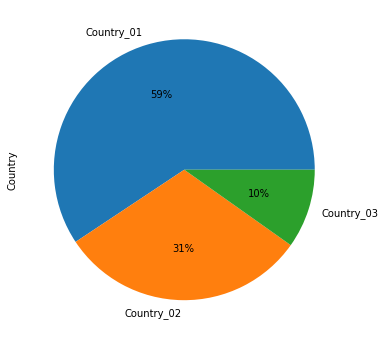

In [27]:
print('--'*30); print('Value Counts for `Country` label'); print('--'*30)

total_row_cnt = industry_df.shape[0]
country_01_cnt = industry_df[industry_df.Country == 'Country_01'].shape[0]
country_02_cnt = industry_df[industry_df.Country == 'Country_02'].shape[0]
country_03_cnt = industry_df[industry_df.Country == 'Country_03'].shape[0]

print(f'Country_01 count: {country_01_cnt} i.e. {round(country_01_cnt/total_row_cnt*100, 0)}%')
print(f'Country_02 count: {country_02_cnt} i.e. {round(country_02_cnt/total_row_cnt*100, 0)}%')
print(f'Country_03 count: {country_03_cnt} i.e. {round(country_03_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Country` label'); print('--'*30)
_ = industry_df['Country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (10, 6))

#### Observation:
- 59% accidents occurred in Country_01
- 31% accidents occurred in Country_02
- 10% accidents occurred in Country_03

### Local

In [28]:
# !pip install jupyter_bokeh
# !pip install bokeh==2.4.0
# !pip install holoviews==1.14.2

In [29]:
import holoviews as hv
from holoviews import opts, dim
#from bokeh.sampledata.les_mis import data
import panel as pn

In [30]:
import bokeh as bk
print(bk.__version__, hv.__version__)

2.4.0 1.14.2


In [31]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.models.glyphs import MultiLine

In [32]:
from pylab import *

In [33]:
from bokeh.io import show
import holoviews as hv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
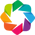

In [34]:
local_cnt = np.round(industry_df['Local'].value_counts(normalize=True) * 100)
#pn.extension()
hv.extension('bokeh')
plot = hv.Bars(local_cnt).opts(title="Local Count", color="#8888ff", xlabel="Locals", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=700, height=300, tools=['hover']))
bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

#### Observation:
- Highest manufacturing plants are located in Local_03 city.
- Lowest manufacturing plants are located in Local_09 and Local_11 city.

#### Industry Sector

In [35]:
print('--'*30); print('Value Counts for `Industry Sector` label'); print('--'*30)

Mining_cnt = industry_df[industry_df['Industry Sector'] == 'Mining'].shape[0]
Metals_cnt = industry_df[industry_df['Industry Sector'] == 'Metals'].shape[0]
Others_cnt = industry_df[industry_df['Industry Sector'] == 'Others'].shape[0]

print(f'Mining count: {Mining_cnt} i.e. {round(Mining_cnt/total_row_cnt*100, 0)}%')
print(f'Metals count: {Metals_cnt} i.e. {round(Metals_cnt/total_row_cnt*100, 0)}%')
print(f'Others count: {Others_cnt} i.e. {round(Others_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Industry Sector` label'); print('--'*30)

sector_cnt = np.round(industry_df['Industry Sector'].value_counts(normalize=True) * 100)

plot = hv.Bars(sector_cnt).opts(title="Industry Sector Count", color="#8888ff", xlabel="Sectors", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))\
                * hv.Text('Mining', 15, f"{int(sector_cnt.loc['Mining'])}%")\
                * hv.Text('Metals', 15, f"{int(sector_cnt.loc['Metals'])}%")\
                * hv.Text('Others', 15, f"{int(sector_cnt.loc['Others'])}%")
bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

------------------------------------------------------------
Value Counts for `Industry Sector` label
------------------------------------------------------------
Mining count: 237 i.e. 57.0%
Metals count: 134 i.e. 32.0%
Others count: 47 i.e. 11.0%
------------------------------------------------------------
Distributon of `Industry Sector` label
------------------------------------------------------------


- 57% manufacturing plants belongs to Mining sector.
- 32% manufacturing plants belongs to Metals sector.
- 11% manufacturing plants belongs to Others sector.

#### Accident Levels

In [36]:
print('--'*30); print('Value Counts for `Accident Level` label'); print('--'*40)

I_acc_cnt = industry_df[industry_df['Accident Level'] == 'I'].shape[0]
II_acc_cnt = industry_df[industry_df['Accident Level'] == 'II'].shape[0]
III_acc_cnt = industry_df[industry_df['Accident Level'] == 'III'].shape[0]
IV_acc_cnt = industry_df[industry_df['Accident Level'] == 'IV'].shape[0]
V_acc_cnt = industry_df[industry_df['Accident Level'] == 'V'].shape[0]
VI_acc_cnt = industry_df[industry_df['Accident Level'] == 'VI'].shape[0]

print(f'Accident Level - I count: {I_acc_cnt} i.e. {round(I_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - II count: {II_acc_cnt} i.e. {round(II_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - III count: {III_acc_cnt} i.e. {round(III_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - IV count: {IV_acc_cnt} i.e. {round(IV_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - V count: {V_acc_cnt} i.e. {round(V_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - VI count: {VI_acc_cnt} i.e. {round(VI_acc_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Value Counts for `Potential Accident Level'); print('--'*40)

I_pot_acc_cnt = industry_df[industry_df['Potential Accident Level'] == 'I'].shape[0]
II_pot_acc_cnt = industry_df[industry_df['Potential Accident Level'] == 'II'].shape[0]
III_pot_acc_cnt = industry_df[industry_df['Potential Accident Level'] == 'III'].shape[0]
IV_pot_acc_cnt = industry_df[industry_df['Potential Accident Level'] == 'IV'].shape[0]
V_pot_acc_cnt = industry_df[industry_df['Potential Accident Level'] == 'V'].shape[0]
VI_pot_acc_cnt = industry_df[industry_df['Potential Accident Level'] == 'VI'].shape[0]

print(f'Potential Accident Level - I count: {I_pot_acc_cnt} i.e. {round(I_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - II count: {II_pot_acc_cnt} i.e. {round(II_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - III count: {III_pot_acc_cnt} i.e. {round(III_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - IV count: {IV_pot_acc_cnt} i.e. {round(IV_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - V count: {V_pot_acc_cnt} i.e. {round(V_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - VI count: {VI_pot_acc_cnt} i.e. {round(VI_pot_acc_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Accident Level` & `Potential Accident Level` label'); print('--'*40)

ac_level_cnt = np.round(industry_df['Accident Level'].value_counts(normalize=True) * 100)
pot_ac_level_cnt = np.round(industry_df['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)
ac_pot = pd.concat([ac_level_cnt, pot_ac_level_cnt], axis=1,sort=False).fillna(0).rename(columns={'Accident Level':'Accident', 'Potential Accident Level':'Potential'})
ac_pot = pd.melt(ac_pot.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})

plot = hv.Bars(ac_pot, ['Severity', 'Levels'], 'value').opts(opts.Bars(title="Accident Levels Count", width=700, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=45, ylabel="Percentage", yformatter='%d%%'))

bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

------------------------------------------------------------
Value Counts for `Accident Level` label
--------------------------------------------------------------------------------
Accident Level - I count: 309 i.e. 74.0%
Accident Level - II count: 40 i.e. 10.0%
Accident Level - III count: 31 i.e. 7.0%
Accident Level - IV count: 30 i.e. 7.0%
Accident Level - V count: 8 i.e. 2.0%
Accident Level - VI count: 0 i.e. 0.0%
------------------------------------------------------------
Value Counts for `Potential Accident Level
--------------------------------------------------------------------------------
Potential Accident Level - I count: 45 i.e. 11.0%
Potential Accident Level - II count: 95 i.e. 23.0%
Potential Accident Level - III count: 106 i.e. 25.0%
Potential Accident Level - IV count: 141 i.e. 34.0%
Potential Accident Level - V count: 30 i.e. 7.0%
Potential Accident Level - VI count: 1 i.e. 0.0%
------------------------------------------------------------
Distributon of `Accident Lev

- The number of accidents decreases as the Accident Level increases.
- The number of accidents increases as the Potential Accident Level increases.

#### Gender

In [37]:
print('--'*30); print('Value Counts for `Gender` label'); print('--'*30)

Male_cnt = industry_df[industry_df['Gender'] == 'Male'].shape[0]
Female_cnt = industry_df[industry_df['Gender'] == 'Female'].shape[0]

print(f'Male count: {Male_cnt} i.e. {round(Male_cnt/total_row_cnt*100, 0)}%')
print(f'Female count: {Female_cnt} i.e. {round(Female_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Gender` label'); print('--'*30)

gender_cnt = np.round(industry_df['Gender'].value_counts(normalize=True) * 100)

plot = hv.Bars(gender_cnt).opts(title="Gender Count", color="#8888ff", xlabel="Gender", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))

bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

------------------------------------------------------------
Value Counts for `Gender` label
------------------------------------------------------------
Male count: 396 i.e. 95.0%
Female count: 22 i.e. 5.0%
------------------------------------------------------------
Distributon of `Gender` label
------------------------------------------------------------


- There are more men working in this industry as compared to women.

#### Employee type

In [38]:
print('--'*30); print('Value Counts for `Employee type` label'); print('--'*30)

third_party_cnt = industry_df[industry_df['Employee type'] == 'Third Party'].shape[0]
emp_cnt = industry_df[industry_df['Employee type'] == 'Employee'].shape[0]
third_rem_cnt = industry_df[industry_df['Employee type'] == 'Third Party (Remote)'].shape[0]

print(f'Third Party count: {third_party_cnt} i.e. {round(third_party_cnt/total_row_cnt*100, 0)}%')
print(f'Employee count: {emp_cnt} i.e. {round(emp_cnt/total_row_cnt*100, 0)}%')
print(f'Third Party (Remote) count: {third_rem_cnt} i.e. {round(third_rem_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Employee type` label'); print('--'*30)

emp_type_cnt = np.round(industry_df['Employee type'].value_counts(normalize=True) * 100)

plot = hv.Bars(emp_type_cnt).opts(title="Employee type Count", color="#8888ff", xlabel="Employee Type", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))

bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

------------------------------------------------------------
Value Counts for `Employee type` label
------------------------------------------------------------
Third Party count: 185 i.e. 44.0%
Employee count: 178 i.e. 43.0%
Third Party (Remote) count: 55 i.e. 13.0%
------------------------------------------------------------
Distributon of `Employee type` label
------------------------------------------------------------


- 44% Third party empoyees working in this industry.
- 43% own empoyees working in this industry.
- 13% Third party(Remote) empoyees working in this industry.

#### Critical Risk

In [39]:
cr_risk_cnt = np.round(industry_df['Critical Risk'].value_counts(normalize=True) * 100)

plot = hv.Bars(cr_risk_cnt[::-1]).opts(title="Critical Risk Count", color="#8888ff", xlabel="Critical Risks", ylabel="Percentage", xformatter='%d%%')\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))

bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

- Because most part of the Critical Risks are classified as 'Others', it is thought that there are too many risks to classify precisely.

- And it is also thought that it takes so much time to analyze risks and reasons why the accidents occur.

#### Calendar

In [40]:
year_cnt = np.round(industry_df['Year'].value_counts(normalize=True,sort=False) * 100)
year = hv.Bars(year_cnt).opts(title="Year Count", color="yellow", xlabel="Years")

month_cnt = np.round(industry_df['Month'].value_counts(normalize=True,sort=False) * 100)
month = hv.Bars(month_cnt).opts(title="Month Count", color="#8888ff", xlabel="Months") * hv.Curve(month_cnt).opts(color='red', line_width=3)

plot = (year + month).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(2)

bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

- Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
- Number of accidents are high in beginning of the year and it keeps decreasing later.

In [41]:
day_cnt = np.round(industry_df['Day'].value_counts(normalize=True,sort=False) * 100)
plot = hv.Bars(day_cnt).opts(title="Day Count", color="#8888ff", xlabel="Days") * hv.Curve(day_cnt).opts(width=500, height=300, color='red', line_width=3)

bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

- Number of accidents are very high in particular days like 4, 8 and 16 in every month.

### Bivariate Analysis and Hypothesis testing

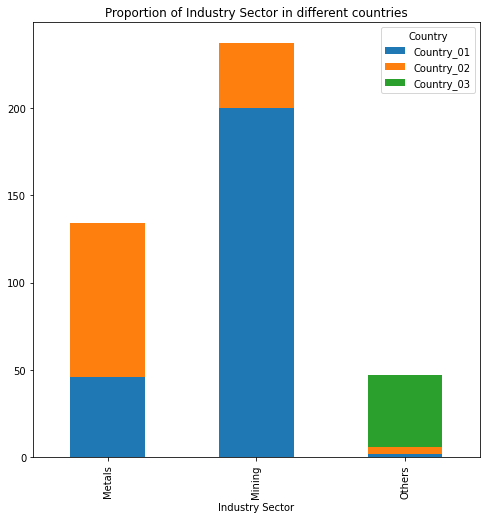

In [42]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = industry_df['Industry Sector'], columns = industry_df['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector in different countries")
plt.show()

#### Observations

- Metals and Mining industry sector plants are not available in Country_03.
- Distribution of industry sector differ significantly in each country. But let's check the proportion of metals, mining and others sector in Country_01 and is that difference is statistically significant?

#### A. Industry Sector by Countries - Is the distribution of industry sector different significantly in differ countries or not?

1. State the H0 and Ha
Ho = The proportions of industry sector is not differ in different countries
Ha = The proportions of industry sector is differ in different countries
2. Decide the significance level: alpha = 0.05
3. Identify the test-statistic: Z-test of proportions¶
4. Calculate the p_value using test-statistic

In [43]:
mining_country1 = industry_df[industry_df['Industry Sector'] == 'Mining']['Country'].value_counts()[0]
mining_country2 = industry_df[industry_df['Industry Sector'] == 'Mining']['Country'].value_counts()[1]

metals_country1 = industry_df[industry_df['Industry Sector'] == 'Metals']['Country'].value_counts()[1]
metals_country2 = industry_df[industry_df['Industry Sector'] == 'Metals']['Country'].value_counts()[0]

others_country1 = industry_df[industry_df['Industry Sector'] == 'Others']['Country'].value_counts()[2]
others_country2 = industry_df[industry_df['Industry Sector'] == 'Others']['Country'].value_counts()[1]
others_country3 = industry_df[industry_df['Industry Sector'] == 'Others']['Country'].value_counts()[0]

print([mining_country1, metals_country1, others_country1], [country_01_cnt])
print(f'Proportions of mining, metals, others in country_01 = {round(200/248,2)}%, {round(46/248,2)}%, {round(2/248,2)}% respectively')

[200, 46, 2] [248]
Proportions of mining, metals, others in country_01 = 0.81%, 0.19%, 0.01% respectively


In [44]:
from statsmodels.stats.proportion import proportions_ztest

# Z-test proportions: More than 2 samples not implemented yet, hence I am passing two elements
t_statistic, p_value = proportions_ztest([mining_country1, metals_country1], [country_01_cnt])

print("Mining and Metals t_statistic", t_statistic)
print("Mining and Metals p_value", p_value)

t_statistic, p_value = proportions_ztest([mining_country1, others_country1], [country_01_cnt])

print("Mining and Others t_statistic", t_statistic)
print("Mining and Others p_value", p_value)

Mining and Metals t_statistic 13.830057992106923
Mining and Metals p_value 1.6788511371823555e-43
Mining and Others t_statistic 18.094920466702863
Mining and Others p_value 3.494480338628687e-73


5. Decide to Reject or Accept Null Hypothesis

In [45]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


- Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from metals sector)

- Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from others sector)

#### B.Employee type by Gender - Is the distribution of employee type differ significantly in different genders?

In [46]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = industry_df.groupby(['Gender','Employee type'])['Employee type'].count().unstack().apply(f, axis=1)

plot = hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Employee type'], 'value').opts(opts.Bars(title="Employee type by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

#### Observations

- Proportion of third party employees in each gender is equal.
- Proportion of third party(remote) employees in each gender is not equal.
- Proportion of own employees in each gender is not equal. But let's check is that difference is statistically significant?

1. State the H0 and Ha
- Ho = The proportions of own employees in each gender is equal.
- Ha = The proportions of own employees in each gender is not equal.
2. Decide the significance level: alpha = 0.05
3. Identify the test-statistic: Z-test of proportions
4. Calculate the p_value using test-statistic

In [47]:
male_emp = industry_df[industry_df['Employee type'] == 'Employee'].Gender.value_counts()[0]
female_emp = industry_df[industry_df['Employee type'] == 'Employee'].Gender.value_counts()[1]

print([male_emp, female_emp], [Male_cnt, Female_cnt])
print(f'Proportion of own employee types in male, female = {round(170/396,2)}%, {round(8/22,2)}% respectively')

[170, 8] [396, 22]
Proportion of own employee types in male, female = 0.43%, 0.36% respectively


In [48]:
t_statistic, p_value = proportions_ztest([male_emp, female_emp], [Male_cnt, Female_cnt])

print("t_statistic", t_statistic)
print("p_value", p_value)

t_statistic 0.6061911815982839
p_value 0.5443878078917722


5. Decide to Reject or Accept Null Hypothesis

In [49]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


- Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from metals sector)

#### c. Industry Sector by Gender - Is the distribution of industry sector differ significantly in different genders?

In [50]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = industry_df.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(f, axis=1)

plot = hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Industry Sector'], 'value').opts(opts.Bars(title="Industry Sector by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

#### Observations

- Proportion of Metals sector employees in each gender is not equal.
- Proportion of Mining sector employees in each gender is not equal.
- Proportion of Others sector employees in each gender is not equal.

#### d. Accident Levels by Gender - Is the distribution of accident levels and potential accident levels differ significantly in different genders?

In [51]:
f = lambda x : np.round(x/x.sum() * 100)

ac_gen = industry_df.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_gen.reset_index(), ['Gender']), ['Gender','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Gender Count"))

pot_ac_gen = industry_df.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_gen.reset_index(), ['Gender']), ['Gender','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Gender Count"))

plot = (ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

#### Observations

- Proportion of accident levels in each gender is not equal and males have a higher accident levels than females.
- There are many low risks at general accident level, but many high risks at potential accident level.

#### e. Accident Levels by Employee type - Is the distribution of accident levels and potential accident levels differ significantly in different employee types?

In [52]:
f = lambda x : np.round(x/x.sum() * 100)

ac_em = industry_df.groupby(['Employee type','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_em.reset_index(), ['Employee type']), ['Employee type','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Employee type Count"))

pot_ac_em = industry_df.groupby(['Employee type','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_em.reset_index(), ['Employee type']), ['Employee type','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Employee type Count"))

plot = (ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%',fontsize={'title':9}))

bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

#### Observations

- For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.

#### f. Accident Levels by Month - Is the distribution of accident levels and potential accident levels differ significantly in different months?

In [53]:
f = lambda x : np.round(x/x.sum() * 100)

ac_mo = industry_df.groupby(['Month','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac = hv.Curve(ac_mo['I'], label='I') * hv.Curve(ac_mo['II'], label='II') * hv.Curve(ac_mo['III'], label='III') * hv.Curve(ac_mo['IV'], label='IV') * hv.Curve(ac_mo['V'], label='V')\
        .opts(opts.Curve(title="Accident Level by Month Count"))

pot_ac_mo = industry_df.groupby(['Month','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
pot_ac = hv.Curve(pot_ac_mo['I'], label='I') * hv.Curve(pot_ac_mo['II'], label='II') * hv.Curve(pot_ac_mo['III'], label='III') * hv.Curve(pot_ac_mo['IV'], label='IV')\
        * hv.Curve(pot_ac_mo['V'], label='V') * hv.Curve(pot_ac_mo['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Month Count"))
        
plot = (ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)
bokeh_obj = hv.render(plot, backend="bokeh")
show(bokeh_obj)

#### Observations

- Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

#### Study Summary Statistics

In [54]:
# Summary statistics
industry_df.drop(columns='Description').describe(exclude=[np.number]).T

count unique                  top freq      first  \
Date                       418    287  2017-02-08 00:00:00    6 2016-01-01   
Country                    418      3           Country_01  248        NaT   
Local                      418     12             Local_03   89        NaT   
Industry Sector            418      3               Mining  237        NaT   
Accident Level             418      5                    I  309        NaT   
Potential Accident Level   418      6                   IV  141        NaT   
Gender                     418      2                 Male  396        NaT   
Employee type              418      3          Third Party  185        NaT   
Critical Risk              418     33               Others  229        NaT   
Weekday                    418      7             Thursday   76        NaT   
Season                     418      4               Autumn  141        NaT   

                               last  
Date                     2017-07-09  
Country                         NaT  
Local                           NaT  
Industry Sector                 NaT  
Accident Level                  NaT  
Potential Accident Level        NaT  
Gender                          NaT  
Employee type                   NaT  
Critical Risk                   NaT  
Weekday                         NaT  
Season                          NaT

#### Study Correlation

In [55]:
# Check the Correlation
industry_df.corr()

Year     Month       Day  WeekofYear
Year        1.000000 -0.416621 -0.001982   -0.418798
Month      -0.416621  1.000000  0.002133    0.964295
Day        -0.001982  0.002133  1.000000    0.060982
WeekofYear -0.418798  0.964295  0.060982    1.000000

#### Observations
- WeekofYear featuer is having very high positive correlation with Month feature.

### EDA Summary:

##### Local

- Highest manufacturing plants are located in Local_03 city and lowest in Local_09 city.
#####  Country

- Percentage(%) of accidents occurred in respective countries: 59% in Country_01, 31% in Country_02 and 10% in Country_03.
#####  Industry Sector

- Percentage(%) of manufacturing plants belongs to respective sectors: 57% to Mining sector, 32% to Metals sector and 11% to Others sector.
#####  Country + Industry Sector

- Metals and Mining industry sector plants are not available in Country_03.
- Distribution of industry sector differ significantly in each country.
 #####  Accident Levels

- The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.
#####  Gender

- There are more men working in this industry as compared to women.
#####  Employee type

- 44% Third party empoyees, 43% own empoyees and 13% Third party(Remote) empoyees working in this industry.
#####  Gender + Employee type

- Proportion of third party employees in each gender is equal, third party(remote) employees in each gender is not equal and own employees in each gender is not equal.
#####  Gender + Industry Sector

- Proportion of Metals, Mining and Others sector employees in each gender is not equal
#####  Gender + Accident Levels

- Males have a higher accident levels than females.
- There are many low risks at general accident level, but many high risks at potential accident level.
#####  Accident Levels + Employee type

- For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.
#####  Accident Levels + Calendar

- Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
- Number of accidents are high in beginning of the year and it keeps decreasing later.
- Number of accidents are very high in particular days like 4, 8 and 16 in every month.
- Number of accidents increased during the middle of the week and declined since the middle of th week.

- Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

- Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not changed much.
#####  Critical Risk

- Most of the critical risks are classified as Others.

### NLP Analysis

In [56]:
# Checking 5 random Description and accident_levels from the data
from random import sample

print('--'*35); print('Checking 5 random Descriptions and accident_levels from the data'); print('--'*35)
rands = sample(range(1, industry_df.shape[0]), 5)
descriptions, accident_levels = list(industry_df.loc[rands, 'Description']), list(industry_df.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

----------------------------------------------------------------------
Checking 5 random Descriptions and accident_levels from the data
----------------------------------------------------------------------
Description: At 11:00 a.m., Mr. Frank with the support of another mechanic, was preparing to place on the floor a metal part called the rear bridge of the forklift. At that moment the part moving part moves generating a blow to the middle finger of the left hand
accident_level: III

Description: In the DDH chamber of the company Explomin, located at the level -100 Socorro ramp 334, when the worker - assistant driller-was dismantling the fifth drill rod (NQ - 3 meters of steel with a weight of 24 kg) , using a stilson key (No. 18), at that moment the operator operates the rotation unit, the drill rod rotates by pressing the left hand of the worker against the base of the rod holder, causing an injury to the left hand. At the time of the accident, the drilling assistant used rubber gl

--------------------------------------------------------------------------------------------------------------
Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 100
--------------------------------------------------------------------------------------------------------------
Description: An auxiliary wheel of the cathode crane G2133 was changed in area 75, when when a bearing was heated and hit with a hammer and chisel at one end of the bearing track, a detachment of a bearing piece occurred, impacting it in the thigh of the right leg producing a cut. The ambulance is called and you are transferred to the clinic.
accident_level: I

Description: In the geological reconnaissance activity, in the farm of Mr. Lázaro, the team composed by Felipe and Divino de Morais, in normal activity encountered a ciliary forest, as they needed to enter the forest to verify a rock outcrop which was the front, the Divine realized the opening of the access

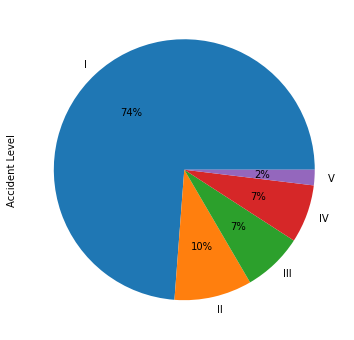

In [57]:
# Checking 5 random Descriptions and accident_levels from the data where the length of headline is > 100
print('--'*55); print('Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 100'); print('--'*55)
indexes = list(industry_df.loc[industry_df['Description'].str.len() > 100, 'Description'].index)
rands = sample(indexes, 5)
descriptions, accident_levels = list(industry_df.loc[rands, 'Description']), list(industry_df.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

print('--'*40); print('Distributon of accident_level where the length of Description is > 100'); print('--'*40)
_ = industry_df.loc[indexes, 'Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['I', 'II', 'III', 'IV', 'V'], figsize = (10, 6))

#### Observations

- 74% of data where accident description > 100 is captured in low accident level.
- Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.
- There are few alphanumeric characters like 042-TC-06, Nv. 3370, CX 212 captured in description where removing these characters might help.
- There are digits in the description for e.g. level 326, Dumper 01 where removing the digits wouldn't help.

------------------------------------------------------------------------------------------------------------------------
Checking 5 random Descriptions and pot_accident_levels from the data where the length of Description is > 100
------------------------------------------------------------------------------------------------------------------------
Description: The clerk was cutting the excess fiberglass in a passing box and had contact with the blade of the marble saw, which cut the glove and caused a wound in his right hand.
pot_accident_level: IV

Description: In the area of ​​Lloclla 50 meters from the sub-station Nro 4, under circumstances that the worker was preparing to pick up the rope from the floor, several fragments of rock slide down the slope of the hill, one of the 5 cm fragments of Diameter approximately impacts the face of the worker producing the aforementioned injury
pot_accident_level: IV

Description: In the geological reconnaissance activity, in the farm of Mr. Lá

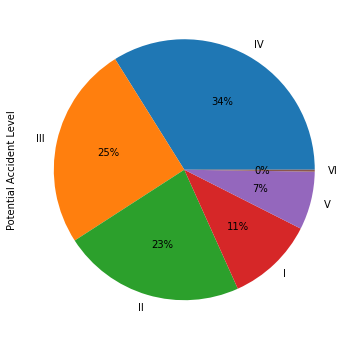

In [58]:
# Checking 5 random Descriptions and pot_accident_levels from the data where the length of headline is > 100
print('--'*60); print('Checking 5 random Descriptions and pot_accident_levels from the data where the length of Description is > 100'); print('--'*60)
indexes = list(industry_df.loc[industry_df['Description'].str.len() > 100, 'Description'].index)
rands = sample(indexes, 5)
descriptions, pot_accident_levels = list(industry_df.loc[rands, 'Description']), list(industry_df.loc[rands, 'Potential Accident Level'])

_ = [print(f'Description: {descriptin}\npot_accident_level: {pot_acclevel}\n') for descriptin, pot_acclevel in zip(descriptions, pot_accident_levels)]

print('--'*40); print('Distributon of pot_accident_level where the length of Description is > 100'); print('--'*40)
_ = industry_df.loc[indexes, 'Potential Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['IV', 'III', 'II', 'I', 'V', 'VI'], figsize = (10, 6))

#### Observations

- 34% of data where accident description > 100 is captured in high medium potential accident level.
- 25% of data where accident description > 100 is captured in medium potential accident level.
- 23% of data where accident description > 100 is captured in low potential accident level.
- Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.
- There are few alphanumeric characters like AFO-755 captured in description where removing these characters might help.
- There are digits in the description for e.g. ditch 3570, 0.50 cm deep, 30 kg where removing the digits wouldn't help.

### NLP Pre-processing

- Few of the NLP pre-processing steps taken before applying model on the data

- Converting to lower case, avoid any capital cases
- Converting apostrophe to the standard lexicons
- Removing punctuations
- Lemmatization
- Removing stop words

In [59]:
### Lower Casing
print('--'*30); print('Converting description to lower case')
industry_df['Cleaned_Description'] = industry_df['Description'].apply(lambda x : x.lower())

------------------------------------------------------------
Converting description to lower case


In [60]:
### Removal of Punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

industry_df["Cleaned_Description"] = industry_df["Cleaned_Description"].apply(lambda text: remove_punctuation(text))
industry_df.head(2)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender Employee type        Critical Risk  \
0                       IV   Male   Third Party              Pressed   
1                       IV   Male      Employee  Pressurized Systems   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   

    Weekday  WeekofYear  Season  \
0    Friday          53  Summer   
1  Saturday          53  Summer   

                                 Cleaned_Description  
0  while removing the drill rod of the jumbo 08 f...  
1  during the activation of a sodium sulphide pum...

In [61]:
### Removal of stopwords
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [62]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

industry_df["Cleaned_Description"] = industry_df["Cleaned_Description"].apply(lambda text: remove_stopwords(text))
industry_df.head(2)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender Employee type        Critical Risk  \
0                       IV   Male   Third Party              Pressed   
1                       IV   Male      Employee  Pressurized Systems   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   

    Weekday  WeekofYear  Season  \
0    Friday          53  Summer   
1  Saturday          53  Summer   

                                 Cleaned_Description  
0  removing drill rod jumbo 08 maintenance superv...  
1  activation sodium sulphide pump piping uncoupl...

In [63]:
### Removal of Frequent words
from collections import Counter
cnt = Counter()
for text in industry_df["Cleaned_Description"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('causing', 166),
 ('hand', 162),
 ('left', 155),
 ('right', 154),
 ('employee', 148),
 ('operator', 121),
 ('injury', 104),
 ('time', 101),
 ('activity', 91),
 ('area', 80)]

In [64]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

industry_df["Cleaned_Description"] = industry_df["Cleaned_Description"].apply(lambda text: remove_freqwords(text))
industry_df.head(2)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender Employee type        Critical Risk  \
0                       IV   Male   Third Party              Pressed   
1                       IV   Male      Employee  Pressurized Systems   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   

    Weekday  WeekofYear  Season  \
0    Friday          53  Summer   
1  Saturday          53  Summer   

                                 Cleaned_Description  
0  removing drill rod jumbo 08 maintenance superv...  
1  activation sodium sulphide pump piping uncoupl...

In [65]:
##Removal of Rare words
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

industry_df["Cleaned_Description"] = industry_df["Cleaned_Description"].apply(lambda text: remove_rarewords(text))
industry_df.head(2)


Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender Employee type        Critical Risk  \
0                       IV   Male   Third Party              Pressed   
1                       IV   Male      Employee  Pressurized Systems   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   

    Weekday  WeekofYear  Season  \
0    Friday          53  Summer   
1  Saturday          53  Summer   

                                 Cleaned_Description  
0  removing drill rod jumbo 08 maintenance superv...  
1  activation sodium sulphide pump piping uncoupl...

In [66]:
print('Removing multiple spaces between words')
industry_df['Cleaned_Description'] = industry_df['Cleaned_Description'].apply(lambda x: re.sub(' +', ' ', x))

Removing multiple spaces between words


In [67]:
# ###Lemmatization
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# def lemmatize_words(text):
#     return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# industry_df["Cleaned_Description"] = industry_df["Cleaned_Description"].apply(lambda text: lemmatize_words(text))
# industry_df.head(2)

#### Get the Length of each line and find the maximum length
- As different lines are of different length. We need to pad the our sequences using the max length.

In [68]:
print('--'*45); print('Get the length of each line, find the maximum length and print the maximum length line'); 
print('Length of line ranges from 64 to 672.'); print('--'*45)

# Get length of each line
industry_df['line_length'] = industry_df['Cleaned_Description'].str.len()

print('Minimum line length: {}'.format(industry_df['line_length'].min()))
print('Maximum line length: {}'.format(industry_df['line_length'].max()))
print('Line with maximum length: {}'.format(industry_df[industry_df['line_length'] == industry_df['line_length'].max()]['Cleaned_Description'].values[0]))

------------------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Length of line ranges from 64 to 672.
------------------------------------------------------------------------------------------
Minimum line length: 45
Maximum line length: 640
Line with maximum length: 02252017 1305 pm assisting gps magnetometric collaborator gilvânio bumped top field hat branch attacked maribondos moths went towards eyes due use sunglasses attack region prevented insects moved side face getting caught ear back field hat making helper get two bites behind ear gilvânio allergic marimbondos bites soon immediately paralyzed drove car accident took medicine antiallergic already used situations work indicated another doctor avoid swelling marcelo responsible project also field mapping called radio immediately assistant felt good taken emergency hospital lavras sul consulted doctor took antiallergi

In [69]:
print('--'*45); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
print('Number of words ranges from 10 to 98.'); print('--'*45)

# Get length of each line
industry_df['nb_words'] = industry_df['Cleaned_Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(industry_df['nb_words'].min()))
print('Maximum number of words: {}'.format(industry_df['nb_words'].max()))
print('Line with maximum number of words: {}'.format(industry_df[industry_df['nb_words'] == industry_df['nb_words'].max()]['Cleaned_Description'].values[0]))

------------------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 10 to 98.
------------------------------------------------------------------------------------------
Minimum number of words: 7
Maximum number of words: 93
Line with maximum number of words: performing sleeve removal maneuver hole 600 meters deep general da silva pressed one side locking nut rods together jack holds entire weight rods maneuver locking procedure effective weight rods secured steel wire rope probe winch moment driller pedro released brake winch inefficacy locking done one side chestnut without aid monkey caused sliding rods auxiliary prepared manual unlocking rods holding faucet key firmly probe tower composition shifted stems slid hands shifted downward strike base probe tower structure cuts 4th 5th quirodactyl taken hospital went medical care wound sutured 1

### WordCloud

In [70]:
def plot_wordcloud(_words, _title):
    plt.figure(figsize=(10,10), dpi=100)
    WC = WordCloud(width=1200, height=600, max_words=750, min_font_size=5)
    all_words = WC.generate(_words)
    plt.imshow(all_words, interpolation='bilinear')
    plt.title(_title, fontsize=10)
    plt.axis("off")
    plt.show()


def display_word_cloud(_df, _on_future):
    print('Word Cloud')
    _df['Processed_Description'] = _df['Processed_Description'].fillna('')
    
    labels = _df[_on_future].unique()
    
    for level in labels:
        future_words = ' '.join(_df.loc[_df[_on_future] == level, 'Processed_Description'])
        plot_wordcloud(future_words, _title='Word Cloud of {} - {}'.format(_on_future.upper(), level))
        print("-----------------------------------------------\n")

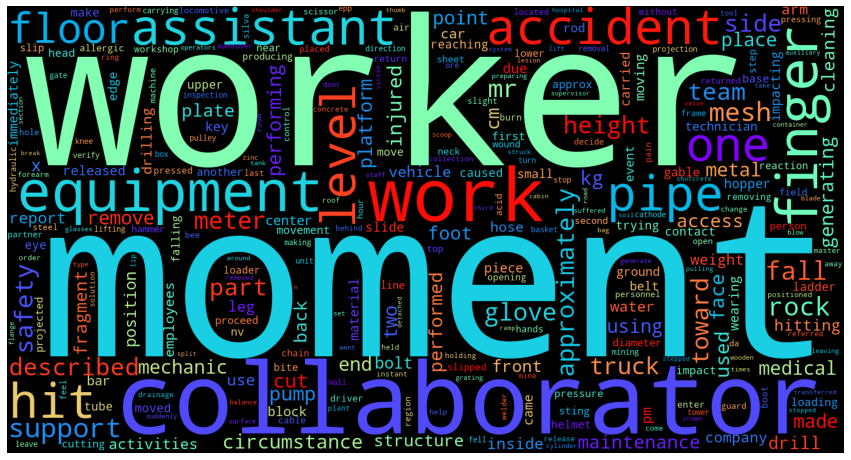

In [71]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(industry_df['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observations

- There are many body-related, employee related, movement-related, equipment-related and accident-related words.

- Body-related: left, right, hand, finger, face, foot and glove
- Employee-related: employee, operator, collaborator, assistant, worker and mechanic
- Movement-related: fall, hit, lift and slip
- Equipment-related: equipment, pump, meter, drill, truck and tube
- Accident-related: accident, activity, safety, injury, causing

### NLP text summary statistics

In [72]:
print('--'*30); print('Five point summary for number of words')
display(industry_df['nb_words'].describe().round(0).astype(int)); 

print('99% quantilie: {}'.format(industry_df['nb_words'].quantile(0.99)));print('--'*30)

------------------------------------------------------------
Five point summary for number of words


count    418
mean      31
std       16
min        7
25%       18
50%       29
75%       40
max       93
Name: nb_words, dtype: int32

99% quantilie: 78.82999999999998
------------------------------------------------------------


#### NLP Pre-processing Summary:

- 74% of data where accident description > 100 is captured in low accident level.
- 34% of data where accident description > 100 is captured in high medium potential accident level.
- 25% of data where accident description > 100 is captured in medium potential accident level.
- 23% of data where accident description > 100 is captured in low potential accident level.
- Few of the NLP pre-processing steps taken before applying model on the data

- Converting to lower case, avoid any capital cases
- Converting apostrophe to the standard lexicons
- Removing punctuations
- Lemmatization
- Removing stop words
- After pre-processing steps:

- Minimum line length: 64
- Maximum line length: 672
- Minimum number of words: 10
- Maximum number of words: 98

### Feature Engineering
- **Variable Creation - Word2Vec Embeddings**

In [73]:
from gensim.models import Word2Vec
# define training data
sentences = industry_df['Cleaned_Description']

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=48, vector_size=100, alpha=0.025)
[' ', 'e', 'i', 'r', 't', 'a', 'n', 'o', 's', 'l', 'c', 'd', 'p', 'm', 'g', 'u', 'h', 'f', 'b', 'v', 'k', 'w', 'y', '0', '1', 'x', '2', '5', '4', '3', 'j', 'q', '8', '7', '6', 'z', '9', '\u200b', '°', 'á', 'é', 'ã', 'ó', 'â', 'í', '¼', 'ô', 'ú']
Word2Vec(vocab=48, vector_size=100, alpha=0.025)


#### Variable Creation - Glove Word Embeddings¶

In [74]:
embeddings_index = {}
EMBEDDING_FILE = 'glove.6B.200d.txt'

f = open(EMBEDDING_FILE, encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:22, 17760.21it/s]

Found 400000 word vectors.


In [75]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [76]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(industry_df['Cleaned_Description'])]

100%|██████████| 418/418 [00:00<00:00, 2362.40it/s]


In [77]:
ind_glove_df[0]

array([ 1.39856245e-03,  8.99862126e-02,  1.08799164e-03, -3.09016760e-02,
        6.19197078e-03,  6.87033385e-02, -1.02347635e-01, -2.87667587e-02,
       -6.25691786e-02,  4.17288505e-02, -1.61288977e-02,  1.33184874e-02,
        1.12336598e-01,  1.67398853e-03,  8.71078447e-02, -1.93325020e-02,
       -3.66557874e-02, -2.86911987e-02,  7.09104389e-02,  8.07439629e-03,
       -4.30122279e-02,  6.14812076e-01,  9.06249657e-02,  1.87851384e-03,
        3.43448929e-02,  3.48158218e-02, -3.08507830e-02,  2.58244704e-02,
       -3.18089649e-02, -6.93444610e-02,  5.13918102e-02, -4.53802906e-02,
        1.09138573e-02, -1.77216530e-02,  1.88153088e-02, -3.13805038e-04,
       -8.93176496e-02, -6.43905252e-02, -7.05620348e-02,  4.99016382e-02,
        6.68967739e-02,  3.37204821e-02, -1.01575870e-02,  6.47136495e-02,
        3.32460664e-02,  6.59773797e-02,  4.91438136e-02,  2.39142426e-03,
        4.29478846e-02,  7.00706914e-02,  3.60498391e-02,  1.07721733e-02,
       -5.63761368e-02, -

### Variable Creation - TFIDF Features

In [78]:
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(industry_df['Cleaned_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head(3)

TFIDF_accident  TFIDF_assistant  TFIDF_collaborator  TFIDF_equipment  \
0             0.0              0.0            0.000000           0.7366   
1             0.0              0.0            0.000000           0.0000   
2             0.0              0.0            0.828076           0.0000   

   TFIDF_finger  TFIDF_floor  TFIDF_level  TFIDF_moment  TFIDF_pipe  \
0           0.0          0.0     0.000000      0.676329         0.0   
1           0.0          0.0     0.000000      0.000000         0.0   
2           0.0          0.0     0.404764      0.000000         0.0   

   TFIDF_work  ...  TFIDF_1st degree burn  TFIDF_allergic reaction returned  \
0    0.000000  ...                    0.0                               0.0   
1    0.000000  ...                    0.0                               0.0   
2    0.387888  ...                    0.0                               0.0   

   TFIDF_manoel da silva  TFIDF_place clerk wearing  \
0                    0.0                        0.0   
1                    0.0                        0.0   
2                    0.0                        0.0   

   TFIDF_returned normal activities  TFIDF_thermal recovery boiler  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   

   TFIDF_type allergic reaction  TFIDF_used safety glasses  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   

   TFIDF_wearing safety gloves  TFIDF_worker wearing safety  
0                          0.0                          0.0  
1                          0.0                          0.0  
2                          0.0                          0.0  

[3 rows x 30 columns]

In [79]:
ind_tfidf_df.to_csv('tfidf.csv', index=False)

### Variable Creation - Label Encoding

In [80]:
# To replace white space everywhere in Employee type
industry_df['Employee type'] = industry_df['Employee type'].str.replace(' ', '_')
industry_df['Employee type'].value_counts()

Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: Employee type, dtype: int64

In [81]:
# To replace white space everywhere in Critical Risk
industry_df['Critical Risk'] = industry_df['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
industry_df['Critical Risk'].value_counts().head()

Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: Critical Risk, dtype: int64

In [82]:
# Create Industry DataFrame
ind_featenc_df = pd.DataFrame()

# Label encoding
industry_df['Season'] = industry_df['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
ind_featenc_df['Season'] = LabelEncoder().fit_transform(industry_df['Season']).astype(np.int8)

industry_df['Weekday'] = industry_df['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
ind_featenc_df['Weekday'] = LabelEncoder().fit_transform(industry_df['Weekday']).astype(np.int8)

ind_featenc_df['Accident Level'] = LabelEncoder().fit_transform(industry_df['Accident Level']).astype(np.int8)
ind_featenc_df['Potential Accident Level'] = LabelEncoder().fit_transform(industry_df['Potential Accident Level']).astype(np.int8)

In [83]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(ind_featenc_df['Accident Level'])
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [84]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(industry_df['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(industry_df['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(industry_df['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(industry_df['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(industry_df['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(industry_df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
ind_featenc_df = ind_featenc_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

ind_featenc_df = industry_df[['Year','Month','Day','WeekofYear']].reset_index(drop=True).join(ind_featenc_df.reset_index(drop=True))

ind_featenc_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  ...  CR_Projection  \
0                         3           0           0  ...              0   
1                         3           1           0  ...              0   
2                         2           0           0  ...              0   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                      0                    0                           0   
1                      0                    0                           0   
2                      0                    0                           0   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                           0                   0           0   
1                           0                   0           0   
2                           0                   0           0   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  
0                                 0                    0                    0  
1                                 0                    0                    0  
2                                 0                    0                    0  

[3 rows x 58 columns]

In [85]:
# Check NaN values
np.any(np.isnan(ind_featenc_df))

False

### Combine Glove and Encoded Features

In [86]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))

In [87]:
ind_feat_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  ...        20        21  \
0                         3           0           0  ... -0.043012  0.614812   
1                         3           1           0  ... -0.113770  0.544657   
2                         2           0           0  ... -0.036849  0.558582   

         22        23        24        25        26        27        28  \
0  0.090625  0.001879  0.034345  0.034816 -0.030851  0.025824 -0.031809   
1 -0.064009 -0.086475  0.117629 -0.105424 -0.074857  0.010581  0.000680   
2  0.093441 -0.030658  0.069354 -0.004236 -0.018489 -0.004923 -0.082681   

         29  
0 -0.069344  
1  0.057184  
2 -0.079758  

[3 rows x 88 columns]

### Combine TFIDF and Encoded Features

In [88]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(ind_tfidf_df.reset_index(drop=True))

In [89]:
ind_feat_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  ...  \
0                         3           0           0  ...   
1                         3           1           0  ...   
2                         2           0           0  ...   

   TFIDF_1st degree burn  TFIDF_allergic reaction returned  \
0                    0.0                               0.0   
1                    0.0                               0.0   
2                    0.0                               0.0   

   TFIDF_manoel da silva  TFIDF_place clerk wearing  \
0                    0.0                        0.0   
1                    0.0                        0.0   
2                    0.0                        0.0   

   TFIDF_returned normal activities  TFIDF_thermal recovery boiler  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   

   TFIDF_type allergic reaction  TFIDF_used safety glasses  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   

   TFIDF_wearing safety gloves  TFIDF_worker wearing safety  
0                          0.0                          0.0  
1                          0.0                          0.0  
2                          0.0                          0.0  

[3 rows x 88 columns]

### Sampling Techniques - Create Training and Test Set

In [90]:
X = ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = ind_feat_df['Accident Level']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [92]:
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, dummy_y, test_size = 0.20, random_state = 1, stratify = y)

In [93]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334,86)
y_train shape : (334,)
X_test shape : (84,86)
y_test shape : (84,)


### Resampling Techniques — Oversample minority class

In [94]:
# Display old accident level counts
ind_feat_df['Accident Level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [95]:
# Concatenate our training data back together
X_up = pd.concat([X_train, y_train], axis=1)

# Get the majority and minority class
acclevel_0_majority = X_up[X_up['Accident Level'] == 0]
acclevel_1_minority = X_up[X_up['Accident Level'] == 1]
acclevel_2_minority = X_up[X_up['Accident Level'] == 2]
acclevel_3_minority = X_up[X_up['Accident Level'] == 3]
acclevel_4_minority = X_up[X_up['Accident Level'] == 4]

# Upsample Level1 minority class
acclevel_1_minority_upsampled = resample(acclevel_1_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level2 minority class
acclevel_2_minority_upsampled = resample(acclevel_2_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level3 minority class
acclevel_3_minority_upsampled = resample(acclevel_3_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level4 minority class
acclevel_4_minority_upsampled = resample(acclevel_4_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

In [96]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([acclevel_0_majority, acclevel_1_minority_upsampled, acclevel_2_minority_upsampled, acclevel_3_minority_upsampled, 
                          acclevel_4_minority_upsampled])

In [97]:
# Display new accident level counts
df_upsampled['Accident Level'].value_counts()

0    247
1    247
2    247
3    247
4    247
Name: Accident Level, dtype: int64

In [98]:
# Separate input features and target
X_train_up = df_upsampled.drop(['Accident Level'], axis = 1) # Considering all Predictors
y_train_up = df_upsampled['Accident Level']

### SMOTE - Generate synthetic samples - upsample smaller class

In [99]:
sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
df_smote.columns = ['Year', 'Month', 'Day',
        'WeekofYear', 'Season', 'Weekday',
       'Country_02', 'Country_03', 'Local_02', 'Local_03', 'Local_04',
       'Local_05', 'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10',
       'Local_11', 'Local_12', 'Male', 'IS_Mining', 'IS_Others',
       'EmpType_Third_Party', 'EmpType_Third_Party_(Remote)',
       'CR_Blocking_and_isolation_of_energies', 'CR_Burn',
       'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools', 'CR_Projection_of_fragments',
       'CR_Suspended_Loads', 'CR_Traffic', 'CR_Vehicles_and_Mobile_Equipment',
       'CR_Venomous_Animals', 'CR_remains_of_choco', 'TFIDF_activity', 'TFIDF_area',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_operator', 'TFIDF_right', 'TFIDF_time',
       'TFIDF_causing injury', 'TFIDF_described injury',
       'TFIDF_employee reports', 'TFIDF_finger left', 'TFIDF_injury described',
       'TFIDF_left foot', 'TFIDF_left hand', 'TFIDF_medical center',
       'TFIDF_right hand', 'TFIDF_time accident',
       'TFIDF_causing injury described', 'TFIDF_described time accident',
       'TFIDF_finger left hand', 'TFIDF_finger right hand',
       'TFIDF_generating described injury', 'TFIDF_hand causing injury',
       'TFIDF_injury time accident', 'TFIDF_left hand causing',
       'TFIDF_right hand causing', 'TFIDF_time accident employee', 'Accident Level']

In [100]:
# Separate input features and target
X_train_smote = df_smote.iloc[:,:-1] # Considering all Predictors
y_train_smote = df_smote.iloc[:,-1:]

In [101]:
X_train_smote.head(1)

Year  Month  Day  WeekofYear  Season  Weekday  Country_02  Country_03  \
0  2016      9    1          35       3        3           1           0   

   Local_02  Local_03  ...  TFIDF_causing injury described  \
0         0         0  ...                             0.0   

   TFIDF_described time accident  TFIDF_finger left hand  \
0                            0.0                     0.0   

   TFIDF_finger right hand  TFIDF_generating described injury  \
0                      0.0                                0.0   

   TFIDF_hand causing injury  TFIDF_injury time accident  \
0                        0.0                         0.0   

   TFIDF_left hand causing  TFIDF_right hand causing  \
0                      0.0                       0.0   

   TFIDF_time accident employee  
0                           0.0  

[1 rows x 86 columns]

In [102]:
# Display new accident level counts
y_train_smote['Accident Level'].value_counts()

0    247
1    247
2    247
3    247
4    247
Name: Accident Level, dtype: int64

In [103]:
# convert integers to dummy variables (i.e. one hot encoded)
y_train_smote_dummy = to_categorical(y_train_smote['Accident Level'])
y_train_smote_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

### Varible Tansformation (Normalization and Scaling)

In [104]:
# Transform independent features
scaler_X = StandardScaler()#StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:6] = pipeline.fit_transform(X_train.iloc[:,:6]) # Scaling only first 6 feautres

X_test.iloc[:,:6] = pipeline.fit_transform(X_test.iloc[:,:6]) # Scaling only first 6 feautres

In [105]:
X_train.head(3)

Year     Month       Day  WeekofYear    Season   Weekday  Country_02  \
202 -0.700765  1.168926 -1.673853    0.996914  1.728348  0.075496           1   
258 -0.700765  1.802213  1.559083    1.934247  1.728348 -0.997510           1   
6   -0.700765 -1.364221  0.058077   -1.382469 -1.221916  1.148501           1   

     Country_03  Local_02  Local_03  ...  TFIDF_1st degree burn  \
202           0         0         0  ...                    0.0   
258           0         0         0  ...                    0.0   
6             0         0         0  ...                    0.0   

     TFIDF_allergic reaction returned  TFIDF_manoel da silva  \
202                               0.0                    0.0   
258                               0.0                    0.0   
6                                 0.0                    0.0   

     TFIDF_place clerk wearing  TFIDF_returned normal activities  \
202                        0.0                               0.0   
258                        0.0                               0.0   
6                          0.0                               0.0   

     TFIDF_thermal recovery boiler  TFIDF_type allergic reaction  \
202                            0.0                           0.0   
258                            0.0                           0.0   
6                              0.0                           0.0   

     TFIDF_used safety glasses  TFIDF_wearing safety gloves  \
202                        0.0                          0.0   
258                        0.0                          0.0   
6                          0.0                          0.0   

     TFIDF_worker wearing safety  
202                          0.0  
258                          0.0  
6                            0.0  

[3 rows x 86 columns]

#### Use PCA - Extract Principal Components that capture about 95% of the variance in the data

In [106]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00300300e+00 -4.24727770e-01  2.53271550e-02 ... -6.31319719e-03
  -6.64408853e-03 -8.59601574e-03]
 [-4.24727770e-01  1.00300300e+00  2.68776694e-02 ...  2.92381737e-03
   2.61058737e-03 -2.43877343e-03]
 [ 2.53271550e-02  2.68776694e-02  1.00300300e+00 ...  1.76480724e-04
   1.61018859e-04  3.40988535e-03]
 ...
 [-6.31319719e-03  2.92381737e-03  1.76480724e-04 ...  8.92808977e-03
  -8.51604338e-05 -1.10179211e-04]
 [-6.64408853e-03  2.61058737e-03  1.61018859e-04 ... -8.51604338e-05
   7.57171287e-03  4.38592310e-03]
 [-8.59601574e-03 -2.43877343e-03  3.40988535e-03 ... -1.10179211e-04
   4.38592310e-03  1.02066618e-02]]
Eigenvectors 
[[-3.52890376e-01 -1.97123911e-02  2.28106458e-01 ... -3.08908901e-17
   1.03678844e-17  0.00000000e+00]
 [ 5.64704319e-01 -2.61242528e-02  8.09332003e-03 ... -3.66244291e-16
   8.76606066e-17  0.00000000e+00]
 [ 2.69537045e-02 -6.57459141e-01  7.14481335e-01 ...  5.39031985e-17
  -2.69757944e-17  0.00000000e+00]
 ...
 [ 2.668

In [107]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.22023509  41.8859459   52.20235353  60.39549535  66.09987644
  71.28395935  75.52064758  77.79519588  79.72474161  81.4983393
  82.87133224  83.99631088  85.02193135  86.00281571  86.82222758
  87.607623    88.3846621   89.12956199  89.8182684   90.4490696
  91.03092493  91.5750099   92.10708875  92.60171216  93.08233797
  93.49570446  93.87131327  94.22416071  94.55257415  94.86779667
  95.15883327  95.43938776  95.69585545  95.94208973  96.1826284
  96.41896992  96.63163607  96.84037557  97.04238374  97.23612057
  97.42009156  97.59046247  97.75610086  97.90824945  98.05693784
  98.1992843   98.33370426  98.45754859  98.57738415  98.69264823
  98.80104329  98.88888079  98.97545805  99.05213406  99.12471158
  99.19062958  99.25335881  99.31464834  99.3738399   99.43024094
  99.48621043  99.53433007  99.57998406  99.61969435  99.65820454
  99.69339211  99.72479112  99.7548631   99.78459395  99.81354972
  99.84170324  99.86895512  99.89554142  99.92154

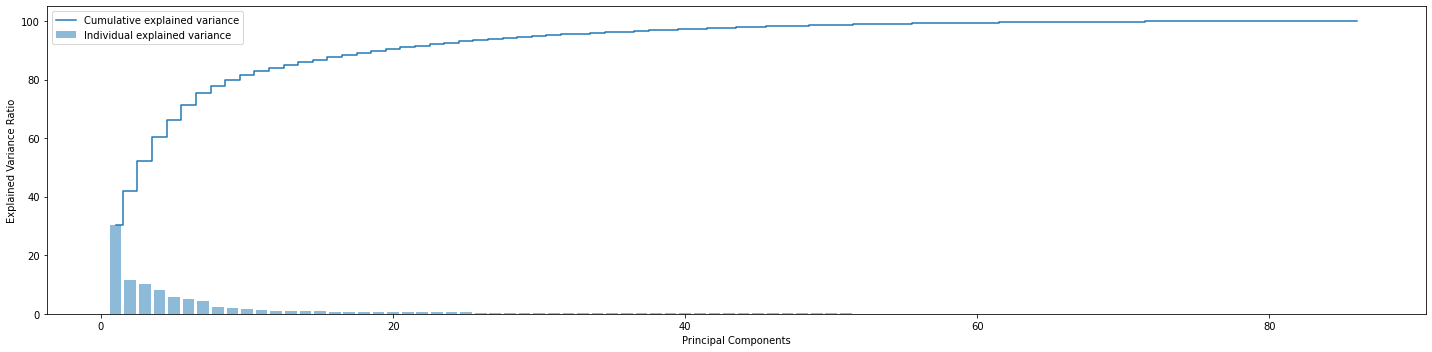

In [108]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [109]:
# Capturing 90% variance of the data
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [110]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(334, 20)
(84, 20)


### Design, train and test machine learning classifiers

In [111]:
### Here we can use the DummyClassifier to predict all accident levels just to show how misleading accuracy can be.
# DummyClassifier to predict all Accident levels
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0 1 2 3 4]
Test score:  0.5714285714285714


In [112]:
# Checking unique values
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()

0    65
1     8
2     5
3     5
4     1
Name: 0, dtype: int64

### Define MultiClass-Logloss¶

In [113]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

### Train and test model

In [114]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    
    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions

In [115]:
####Train and test all models

import lightgbm as lgb

def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

In [116]:
### Model with Hyperparameter Tuning
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # Before starting with grid search we need to create a scoring function. This is accomplished using the make_scorer function of scikit-learn.
    mll_scorer = metrics.make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if name == 'LGBMClassifier':
      grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                       scoring = mll_scorer, error_score=0)
    else:
      grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                 scoring = mll_scorer, error_score=0)
      
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best F1_Score: %f using %s" % (model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      if param == model_grid_result.best_params_:
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))

    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_

#### 1. Modelling - Logistic Regression

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


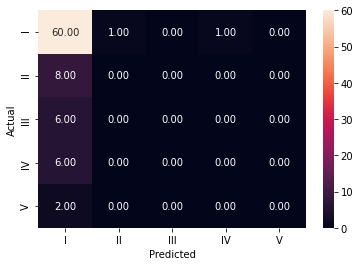

              precision    recall  f1-score   support

           0       0.73      0.97      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.54      0.71      0.62        84



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.742515       0.714286   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.54007  0.714286  0.615079             0.919383

In [117]:
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

resultsDf = pd.DataFrame()

# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'Logistic Regression without Sampling', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf

### 2. Decision Tree - Random Forest Classifier

RandomForestClassifier(n_estimators=10, random_state=1)
***************************************************************************


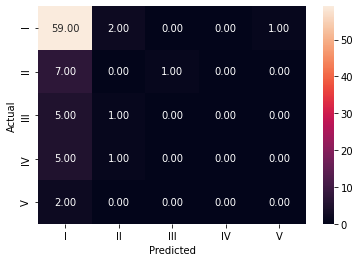

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.56      0.70      0.62        84



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.742515       0.714286   
2      Random Forest with original data        0.970060       0.702381   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.540070  0.714286  0.615079             0.919383  
2   0.558303  0.702381  0.622109             3.870351

In [118]:
# Building a Random Forest Classifier on Training set
rfc_model = RandomForestClassifier(n_estimators=10, random_state=1)

# Train and Test the model
rf_df = train_test_model(rfc_model, 'Random Forest with original data', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rf_df])
resultsDf

### 3. Modelling - Logistic Regression - Oversampling

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


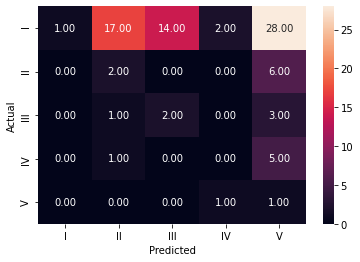

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        62
           1       0.10      0.25      0.14         8
           2       0.12      0.33      0.18         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.04         2

    accuracy                           0.07        84
   macro avg       0.25      0.22      0.08        84
weighted avg       0.76      0.07      0.05        84



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.742515       0.714286   
2      Random Forest with original data        0.970060       0.702381   
3     Logistic Regression with Sampling        0.353036       0.071429   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.540070  0.714286  0.615079             0.919383  
2   0.558303  0.702381  0.622109             3.870351  
3   0.756648  0.071429  0.050613             1.705877

In [119]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_df = train_test_model(lr, 'Logistic Regression with Sampling', X_train_up, X_test, y_train_up, y_test, 'none', 3, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_df])
resultsDf

#### 4. Modelling - Logistic Regression - SMOTE

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


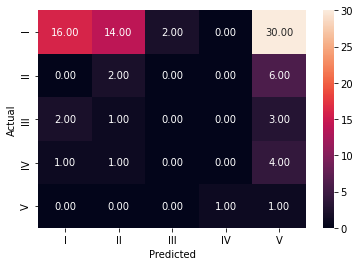

              precision    recall  f1-score   support

           0       0.84      0.26      0.40        62
           1       0.11      0.25      0.15         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.04         2

    accuracy                           0.23        84
   macro avg       0.20      0.20      0.12        84
weighted avg       0.63      0.23      0.31        84



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.742515       0.714286   
2      Random Forest with original data        0.970060       0.702381   
3     Logistic Regression with Sampling        0.353036       0.071429   
4        Logistic Regression with SMOTE        0.403239       0.226190   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.540070  0.714286  0.615079             0.919383  
2   0.558303  0.702381  0.622109             3.870351  
3   0.756648  0.071429  0.050613             1.705877  
4   0.632677  0.226190  0.307280             1.635483

In [120]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_smote_df = train_test_model(lr, 'Logistic Regression with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 4, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

### All models - Original data

In [121]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression        0.742515       0.714286   0.540070   
2              RidgeClassifier        0.760479       0.726190   0.542456   
3         KNeighborsClassifier        0.757485       0.726190   0.562798   
4                          SVC        0.739521       0.738095   0.544785   
5       DecisionTreeClassifier        0.994012       0.642857   0.619267   
6       RandomForestClassifier        0.970060       0.702381   0.558303   
7            BaggingClassifier        0.952096       0.678571   0.546382   
8         ExtraTreesClassifier        0.994012       0.702381   0.544345   
9           AdaBoostClassifier        0.736527       0.714286   0.546737   
10  GradientBoostingClassifier        0.916168       0.690476   0.555968   
11              LGBMClassifier        0.991018       0.654762   0.556099   

      Recall  F1-Score  Multi-Class Logloss  
1   0.714286  0.615079             0.919383  
2   0.726190  0.621018             1.000000  
3   0.726190  0.634138             5.699355  
4   0.738095  0.626875             0.907344  
5   0.642857  0.630279            12.335277  
6   0.702381  0.622109             3.870351  
7   0.678571  0.605344             3.163850  
8   0.702381  0.613347             1.287123  
9   0.714286  0.619381             1.360822  
10  0.690476  0.615964             1.020949  
11  0.654762  0.601411             1.550133

- **By comparing the results from all above methods, we can select the best method as KNeighborsClassifier classifier with f1-score 63.41%**

### All models - Oversampling data

In [122]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_up, X_test, y_train_up, y_test, 'no')

Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression        0.353036       0.071429   0.756648   
2              RidgeClassifier        0.731174       0.071429   0.005102   
3         KNeighborsClassifier        0.948178       0.166667   0.542667   
4                          SVC        0.289069       0.071429   0.005102   
5       DecisionTreeClassifier        0.998381       0.309524   0.500529   
6       RandomForestClassifier        0.998381       0.702381   0.565553   
7            BaggingClassifier        0.997571       0.583333   0.550657   
8         ExtraTreesClassifier        0.998381       0.702381   0.551236   
9           AdaBoostClassifier        0.358704       0.738095   0.551348   
10  GradientBoostingClassifier        0.967611       0.488095   0.607112   
11              LGBMClassifier        0.998381       0.738095   0.551348   

      Recall  F1-Score  Multi-Class Logloss  
1   0.071429  0.050613             1.705877  
2   0.071429  0.009524             1.000000  
3   0.166667  0.172624             8.542107  
4   0.071429  0.009524             1.615629  
5   0.309524  0.356230            23.848203  
6   0.702381  0.626584             3.145776  
7   0.583333  0.565549             1.805096  
8   0.702381  0.617697             2.042302  
9   0.738095  0.631199             1.301081  
10  0.488095  0.535878             1.208430  
11  0.738095  0.631199             1.696074

- **By comparing the results from all above methods, we can select best method as AdaBoostClassifier classifier with f1-score 61.11% and all other methods are over fitting the training data.**

### All models - SMOTE data

In [123]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_smote, X_test, y_train_smote, y_test, 'no')

Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression        0.403239       0.226190   0.632677   
2              RidgeClassifier        0.724696       0.071429   0.005102   
3         KNeighborsClassifier        0.900405       0.130952   0.532777   
4                          SVC        0.294737       0.071429   0.005102   
5       DecisionTreeClassifier        0.998381       0.476190   0.573893   
6       RandomForestClassifier        0.997571       0.666667   0.594558   
7            BaggingClassifier        0.991903       0.595238   0.645563   
8         ExtraTreesClassifier        0.998381       0.630952   0.591596   
9           AdaBoostClassifier        0.498785       0.571429   0.534249   
10  GradientBoostingClassifier        0.945749       0.738095   0.675889   
11              LGBMClassifier        0.997571       0.738095   0.596690   

      Recall  F1-Score  Multi-Class Logloss  
1   0.226190  0.307280             1.635483  
2   0.071429  0.009524             1.000000  
3   0.130952  0.117297             9.363057  
4   0.071429  0.009524             1.634201  
5   0.476190  0.505285            18.091740  
6   0.666667  0.628427             2.876665  
7   0.595238  0.613797             1.878288  
8   0.630952  0.609801             1.029202  
9   0.571429  0.550556             1.399332  
10  0.738095  0.692517             1.011491  
11  0.738095  0.644378             1.616081

- **By comparing the results from all above methods, we can select best method as GradientBoostingClassifier classifier with f1-score 69.25% and all other methods are over fitting the training data.**

### Design, train and test Neural networks classifiers

In [124]:
# disable keras warnings
tf.get_logger().setLevel('ERROR')

In [125]:
# get the accuracy, precision, recall, f1 score from model
def get_classification_metrics(model, X_test, y_test, target_type):
  
  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes, average='micro')

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes, average='micro')

  return accuracy, precision, recall, f1

In [126]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

### Convert Classification to Numeric problem
In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and label encoded target variable. We can use simple densely connected neural networks to make predictions.

Since we have ordinal relationship between each category in target variable, I have considered this one as numerical/regression problem and try to observe the ANN behaviour.

In [127]:
## Sequencial Model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# define the model
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile the keras model
#opt = optimizers.Adam(lr=1e-3)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train, epochs=10, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/10
42/42 [==============================] - 1s 5ms/step - loss: 1.1106 - accuracy: 0.4461 - val_loss: 1.0970 - val_accuracy: 0.5119
Epoch 2/10
42/42 [==============================] - 0s 2ms/step - loss: 1.0131 - accuracy: 0.4281 - val_loss: 1.0611 - val_accuracy: 0.4881
Epoch 3/10
42/42 [==============================] - 0s 2ms/step - loss: 0.9382 - accuracy: 0.4790 - val_loss: 1.0971 - val_accuracy: 0.6310
Epoch 4/10
42/42 [==============================] - 0s 2ms/step - loss: 0.8803 - accuracy: 0.5389 - val_loss: 1.0478 - val_accuracy: 0.5238
Epoch 5/10
42/42 [==============================] - 0s 2ms/step - loss: 0.8229 - accuracy: 0.4910 - val_loss: 1.1280 - val_accuracy: 0.6429
Epoch 6/10
42/42 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.5808 - val_loss: 1.0598 - val_accuracy: 0.5000
Epoch 7/10
42/42 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5419 - val_loss: 1.0816 - val_accuracy: 0.5595
Epoch 8/10
42/42 [==

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                4350      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                6040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 30,681
Trainable params: 30,681
Non-trainable params: 0
_________________________________________________________________


In [129]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)
print('Test accuracy: %.2f' % (accuracy*100))

Test accuracy: 66.67


Text(0.5, 1.0, 'Training and validation loss')

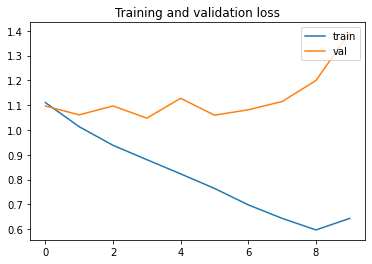

In [130]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot  (epochs, training_history.history['loss'], label = 'train')
plt.plot  (epochs, training_history.history['val_loss'], label = 'val')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

- Above one is underfit model, it can be identified from the learning curve of the training loss only. It is showing noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all and model does not have a suitable capacity for the complexity of the dataset.

- *Multiclass classification - Target variable - One hot encoded*
- In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and one-hot encoded target variable. We can use simple densely connected neural networks to make predictions.

In [131]:
# fix random seed for reproducibility
reset_random_seeds()

#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train, y_train_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train_dummy, epochs=10, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

Epoch 1/10
42/42 [==============================] - 1s 5ms/step - loss: 1.8891 - categorical_accuracy: 0.1677 - val_loss: 1.3653 - val_categorical_accuracy: 0.7143
Epoch 2/10
42/42 [==============================] - 0s 2ms/step - loss: 1.6128 - categorical_accuracy: 0.3383 - val_loss: 1.1776 - val_categorical_accuracy: 0.7381
Epoch 3/10
42/42 [==============================] - 0s 2ms/step - loss: 1.3883 - categorical_accuracy: 0.4521 - val_loss: 1.0731 - val_categorical_accuracy: 0.7381
Epoch 4/10
42/42 [==============================] - 0s 2ms/step - loss: 1.2350 - categorical_accuracy: 0.5659 - val_loss: 1.0149 - val_categorical_accuracy: 0.7381
Epoch 5/10
42/42 [==============================] - 0s 2ms/step - loss: 1.1252 - categorical_accuracy: 0.6497 - val_loss: 0.9608 - val_categorical_accuracy: 0.7381
Epoch 6/10
42/42 [==============================] - 0s 2ms/step - loss: 1.1330 - categorical_accuracy: 0.6737 - val_loss: 0.9334 - val_categorical_accuracy: 0.7381
Epoch 7/10
42/42

In [132]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                870       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [133]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [134]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

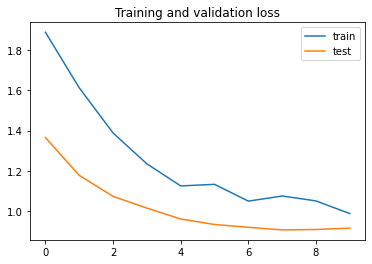

In [135]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

- Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

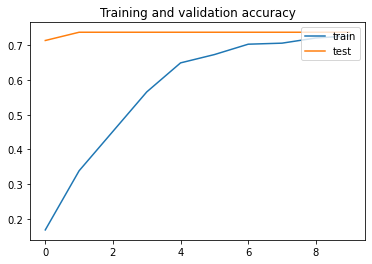

In [136]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

- We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [137]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


### Design, train and test  LSTM classifiers

### Architecture
  1. Create a model with Text inputs only.
  2. Create a model with Categorical inputs only.
  3. Create a model with Multiple inputs.

#### 1. Creating a Model with Text Inputs Only
- Create a classification model that uses accident description column alone.

In [138]:
# Select input and output features
X_text = industry_df['Cleaned_Description']
y_text = industry_df['Accident Level']

In [139]:
# Encode labels in column 'Accident Level'.
lbl_encoder = LabelEncoder()
y_text = lbl_encoder.fit_transform(y_text)

In [140]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1, stratify = y_text)

print('X_text_train shape : ({0})'.format(X_text_train.shape[0]))
print('y_text_train shape : ({0},)'.format(y_text_train.shape[0]))
print('X_text_test shape : ({0})'.format(X_text_test.shape[0]))
print('y_text_test shape : ({0},)'.format(y_text_test.shape[0]))

X_text_train shape : (334)
y_text_train shape : (334,)
X_text_test shape : (84)
y_text_test shape : (84,)


In [141]:
# Convert both the training and test labels into one-hot encoded vectors:
y_text_train = to_categorical(y_text_train)
y_text_test = to_categorical(y_text_test)

In [142]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
# word embeddings is to convert the words into numeric.
#the maximum number of words to keep, based on word frequency

vocab_size = 100000
# token will bw added to word_index and used to replace out-of-vocabulary words during text_to_sequence
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [143]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad the our sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 3049


In [144]:
X_text_train

array([[ 448,  132,  969, ...,    0,    0,    0],
       [ 970, 1508,  555, ...,    0,    0,    0],
       [   8,   69, 1510, ...,    0,    0,    0],
       ...,
       [  10, 3030,  849, ...,    0,    0,    0],
       [  20, 3038,  103, ...,    0,    0,    0],
       [3043,  177,   20, ...,    0,    0,    0]])

In [145]:
X_text_test

array([[  43,   48,    1, ...,    0,    0,    0],
       [2672,    1,  797, ...,    0,    0,    0],
       [ 554,  139,  226, ...,    0,    0,    0],
       ...,
       [  10,    1,    1, ...,    0,    0,    0],
       [3043,  103,   20, ...,    0,    0,    0],
       [   8,   46, 1018, ...,    0,    0,    0]])

In [146]:
labels_al = industry_df['Accident Level'].nunique() 
labels_al

5

In [147]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open('glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [148]:
# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.3, input_shape = (256,))(max_pool_layer_1)

dense_layer_2 = Dense(128, activation = 'relu')(drop_out_layer_1)

dense_layer_3 = Dense(64, activation = 'relu')(dense_layer_2)
flatten_layer_3 = Flatten() (dense_layer_3)

dense_layer_4 = Dense(32, activation = 'relu')(flatten_layer_3)
drop_out_layer_5 = Dropout(0.5, input_shape = (32,))(dense_layer_4)

dense_layer_5 = Dense(labels_al, activation='softmax')(drop_out_layer_5)

model_lstm = Model(inputs = deep_inputs, outputs=dense_layer_5)
#model = Model(inputs=deep_inputs, outputs=dense_layer_3)

#opt = SGD(lr=0.001, momentum=0.9)
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [149]:
print(model_lstm.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 200)          609800    
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 512)          935936    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256  

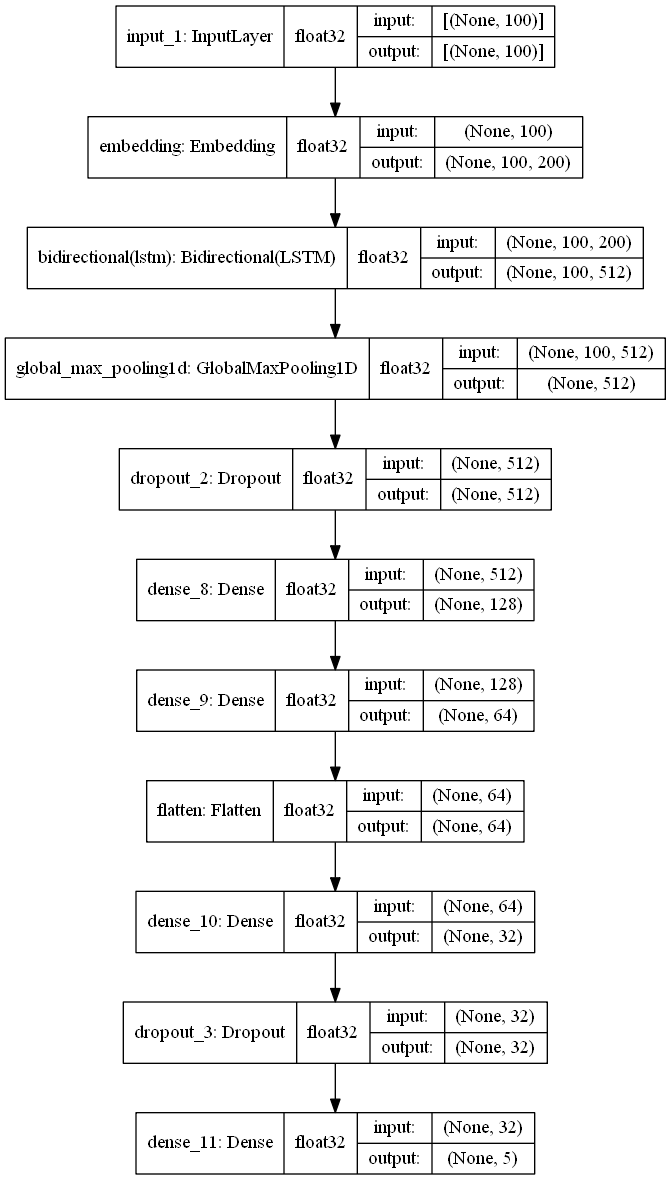

In [150]:
from tensorflow.keras.utils import plot_model

#!pip install pydot
plot_model(model_lstm, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [151]:
X_text_train

array([[ 448,  132,  969, ...,    0,    0,    0],
       [ 970, 1508,  555, ...,    0,    0,    0],
       [   8,   69, 1510, ...,    0,    0,    0],
       ...,
       [  10, 3030,  849, ...,    0,    0,    0],
       [  20, 3038,  103, ...,    0,    0,    0],
       [3043,  177,   20, ...,    0,    0,    0]])

In [152]:
# Use earlystopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_text_train, y_text_train, target_type))

# fit the keras model on the dataset
training_history = model_lstm.fit(X_text_train, y_text_train, epochs=10, 
                             batch_size=32, verbose=1, 
                             validation_data=(X_text_test, y_text_test), 
                             callbacks=[rlrp, metrics])

Epoch 1/10
11/11 [==============================] - 24s 2s/step - loss: 1.3012 - acc: 0.6168 - val_loss: 1.0450 - val_acc: 0.7381
Epoch 2/10
11/11 [==============================] - 20s 2s/step - loss: 1.0955 - acc: 0.7006 - val_loss: 0.9817 - val_acc: 0.7381
Epoch 3/10
11/11 [==============================] - 19s 2s/step - loss: 1.0152 - acc: 0.7156 - val_loss: 0.9452 - val_acc: 0.7381
Epoch 4/10
11/11 [==============================] - 21s 2s/step - loss: 1.0338 - acc: 0.7156 - val_loss: 0.9208 - val_acc: 0.7381
Epoch 5/10
11/11 [==============================] - 19s 2s/step - loss: 0.9888 - acc: 0.7246 - val_loss: 0.9389 - val_acc: 0.7381
Epoch 6/10
11/11 [==============================] - 20s 2s/step - loss: 0.9612 - acc: 0.7156 - val_loss: 0.9108 - val_acc: 0.7381
Epoch 7/10
11/11 [==============================] - 21s 2s/step - loss: 0.9010 - acc: 0.7275 - val_loss: 0.9006 - val_acc: 0.7381
Epoch 8/10
11/11 [==============================] - 20s 2s/step - loss: 0.8354 - acc: 0.72

In [153]:
# evaluate the keras model
_, train_accuracy = model_lstm.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
_, test_accuracy = model_lstm.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 76.95
Test accuracy: 72.62


In [154]:
accuracy, precision, recall, f1 = get_classification_metrics(model_lstm, X_text_test, y_text_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.690476
Precision: 0.734177
Recall: 0.690476
F1 score: 0.711656


Text(0.5, 1.0, 'Training and validation loss')

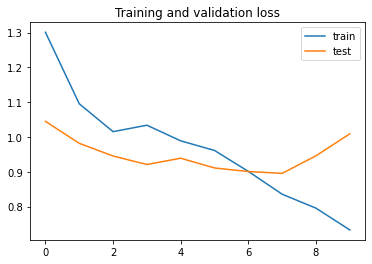

In [155]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

- Above one is not so good fit, it is identified by a training and validation loss that decreases to a point of stability with a  gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

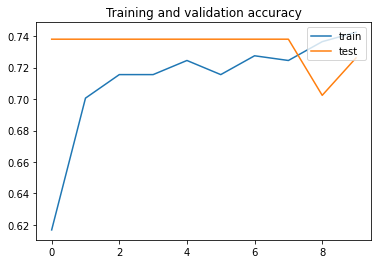

In [156]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

- We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

- **Note: Observed that f1-score nearly 73 % with accident description alone.**

In [157]:
import types
import tempfile
import tensorflow.keras.models

def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=False) as fd:
            tensorflow.keras.models.save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = { 'model_str': model_str }
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=False) as fd:
            fd.write(state['./model_str'])
            fd.flush()
            model = tensorflow.keras.models.load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = tensorflow.keras.models.Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__

In [158]:
import pickle as pkl
import os
make_keras_picklable()

# import pickle as pkl
with open('LSTM_Model.pkl', 'wb') as f:
    pkl.dump(model_lstm, f)

In [159]:
# saving tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [160]:
# saving tokenizer
with open('vec_tfidf.pkl', 'wb') as handle:
    pickle.dump(vec_tfidf, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [161]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


### 2.Creating a Model with Categorical features Only
- In this section, we will create a classification model that uses categorical columns alone. Since the data for these columns is well structured and doesn't contain any sequential or spatial pattern, we can use simple densely connected neural networks to make predictions.

In [162]:
# Select input and output features
X_cat = ind_featenc_df.drop(['Accident Level','Potential Accident Level'], axis = 1)
y_cat = industry_df['Accident Level']

In [163]:
# Encode labels in column 'Accident Level'.
y_cat = lbl_encoder.fit_transform(y_cat)

In [164]:
X_cat

Year  Month  Day  WeekofYear  Season  Weekday  Country_02  Country_03  \
0    2016      1    1          53       0        4           0           0   
1    2016      1    2          53       0        5           1           0   
2    2016      1    6           1       0        2           0           0   
3    2016      1    8           1       0        4           0           0   
4    2016      1   10           1       0        6           0           0   
..    ...    ...  ...         ...     ...      ...         ...         ...   
413  2017      7    4          27       2        1           0           0   
414  2017      7    4          27       2        1           0           0   
415  2017      7    5          27       2        2           1           0   
416  2017      7    6          27       2        3           1           0   
417  2017      7    9          27       2        6           0           0   

     Local_02  Local_03  ...  CR_Projection  CR_Projection/Burning  \
0           0         0  ...              0                      0   
1           1         0  ...              0                      0   
2           0         1  ...              0                      0   
3           0         0  ...              0                      0   
4           0         0  ...              0                      0   
..        ...       ...  ...            ...                    ...   
413         0         0  ...              0                      0   
414         0         1  ...              0                      0   
415         0         0  ...              0                      0   
416         0         0  ...              0                      0   
417         0         0  ...              0                      0   

     CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   
..                   ...                         ...   
413                    0                           0   
414                    0                           0   
415                    0                           0   
416                    0                           0   
417                    0                           0   

     CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                             0                   0           0   
1                             0                   0           0   
2                             0                   0           0   
3                             0                   0           0   
4                             0                   0           0   
..                          ...                 ...         ...   
413                           0                   0           0   
414                           0                   0           0   
415                           0                   0           0   
416                           0                   0           0   
417                           0                   0           0   

     CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  \
0                                   0                    0   
1                                   0                    0   
2                                   0                    0   
3                                   0                    0   
4                                   0                    0   
..                                ...                  ...   
413                                 0                    0   
414                                 0                    0   
415                                 0                    1   
416                                 0                    0   
417                                 0                    0   

    

In [165]:
# Divide our data into testing and training sets:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size = 0.20, random_state = 1, stratify = y_cat)

print('X_cat_train shape : ({0})'.format(X_cat_train.shape[0]))
print('y_cat_train shape : ({0},)'.format(y_cat_train.shape[0]))
print('X_cat_test shape : ({0})'.format(X_cat_test.shape[0]))
print('y_cat_test shape : ({0},)'.format(y_cat_test.shape[0]))

X_cat_train shape : (334)
y_cat_train shape : (334,)
X_cat_test shape : (84)
y_cat_test shape : (84,)


In [166]:
# Convert both the training and test labels into one-hot encoded vectors:
y_cat_train = to_categorical(y_cat_train)
y_cat_test = to_categorical(y_cat_test)

In [167]:
# Variable transformation using StandardScaler
scaler_X = StandardScaler()#StandardScaler()
X_cat_train.iloc[:,:6] = scaler_X.fit_transform(X_cat_train.iloc[:,:6]) # Scaling only first 6 feautres

X_cat_test.iloc[:,:6] = scaler_X.fit_transform(X_cat_test.iloc[:,:6]) # Scaling only first 6 feautresb

In [168]:
X_cat_train.columns

Index(['Year', 'Month', 'Day', 'WeekofYear', 'Season', 'Weekday', 'Country_02',
       'Country_03', 'Local_02', 'Local_03', 'Local_04', 'Local_05',
       'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10', 'Local_11',
       'Local_12', 'Male', 'IS_Mining', 'IS_Others', 'EmpType_Third_Party',
       'EmpType_Third_Party_(Remote)', 'CR_Blocking_and_isolation_of_energies',
       'CR_Burn', 'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools'

In [169]:
# fix random seed for reproducibility
reset_random_seeds()

#param = 1e-9
param = 1e-4

input2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_1 = Dense(256, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm())(input2)
drop_out_layer_1 = Dropout(0.5)(dense_layer_1)
batch_norm_layer_1 = BatchNormalization()(drop_out_layer_1)

dense_layer_2 = Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_2 = Dropout(0.5)(dense_layer_2)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_2)

dense_layer_3 = Dense(labels_al, activation='softmax', kernel_regularizer=l2(param), kernel_constraint=unit_norm())(batch_norm_layer_2)

model = Model(inputs=input2, outputs=dense_layer_3)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [170]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 56)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               14592     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

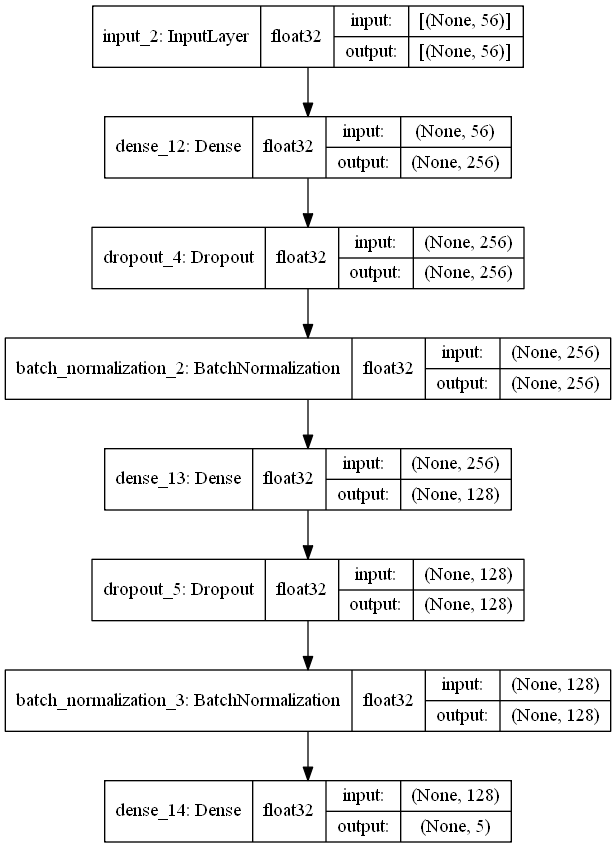

In [171]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [172]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_cat_train, y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_cat_train, y_cat_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_cat_test, y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
11/11 [==============================] - 1s 16ms/step - loss: 2.0451 - acc: 0.1647 - val_loss: 1.6307 - val_acc: 0.1786
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 1.9620 - acc: 0.2096 - val_loss: 1.5740 - val_acc: 0.4286
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 1.8175 - acc: 0.2485 - val_loss: 1.5143 - val_acc: 0.6548
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 1.7694 - acc: 0.2754 - val_loss: 1.4518 - val_acc: 0.7024
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 1.7402 - acc: 0.3024 - val_loss: 1.3963 - val_acc: 0.7381
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 1.6774 - acc: 0.3054 - val_loss: 1.3468 - val_acc: 0.7381
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 1.5428 - acc: 0.3952 - val_loss: 1.2977 - val_acc: 0.7381
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 1.5099 - 

In [173]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_cat_train, y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_cat_test, y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 74.25
Test accuracy: 73.81


In [174]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_cat_test, y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.726190
Precision: 0.762500
Recall: 0.726190
F1 score: 0.743902


Text(0.5, 1.0, 'Training and validation loss')

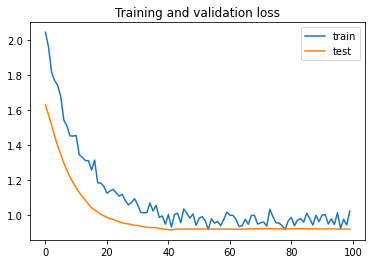

In [175]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

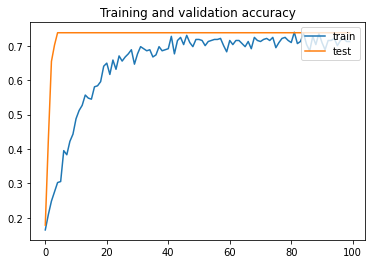

In [176]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

- We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [177]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


### 3. Creating a LSTM Model with Multiple Inputs

In [178]:
from tensorflow.keras.models import Model    
from tensorflow.keras.layers import *

In [179]:
# fix random seed for reproducibility
reset_random_seeds()

input_1 = Input(shape=(maxlen,))
embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

#-------------------------------------------------------------------------------
param = 1e-4

input_2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_5       = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                      kernel_constraint=unit_norm())(input_2)
drop_out_layer_6    = Dropout(0.2)(dense_layer_5)
batch_norm_layer_1  = BatchNormalization()(drop_out_layer_6)
dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                            kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

concat_layer        = Concatenate()([drop_out_layer_5, batch_norm_layer_2])
dense_layer_7       = Dense(10, activation='relu')(concat_layer)
output  = Dense(5, activation='softmax')(dense_layer_7)
model   = Model(inputs=[input_1, input_2], outputs=output)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [180]:
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 200)     609800      input_3[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 100, 256)     336896      embedding_1[0][0]                
__________________________________________________________________________________________________
global_max_pooling1d_1 (GlobalM (None, 256)          0           bidirectional_1[0][0]            
____________________________________________________________________________________________

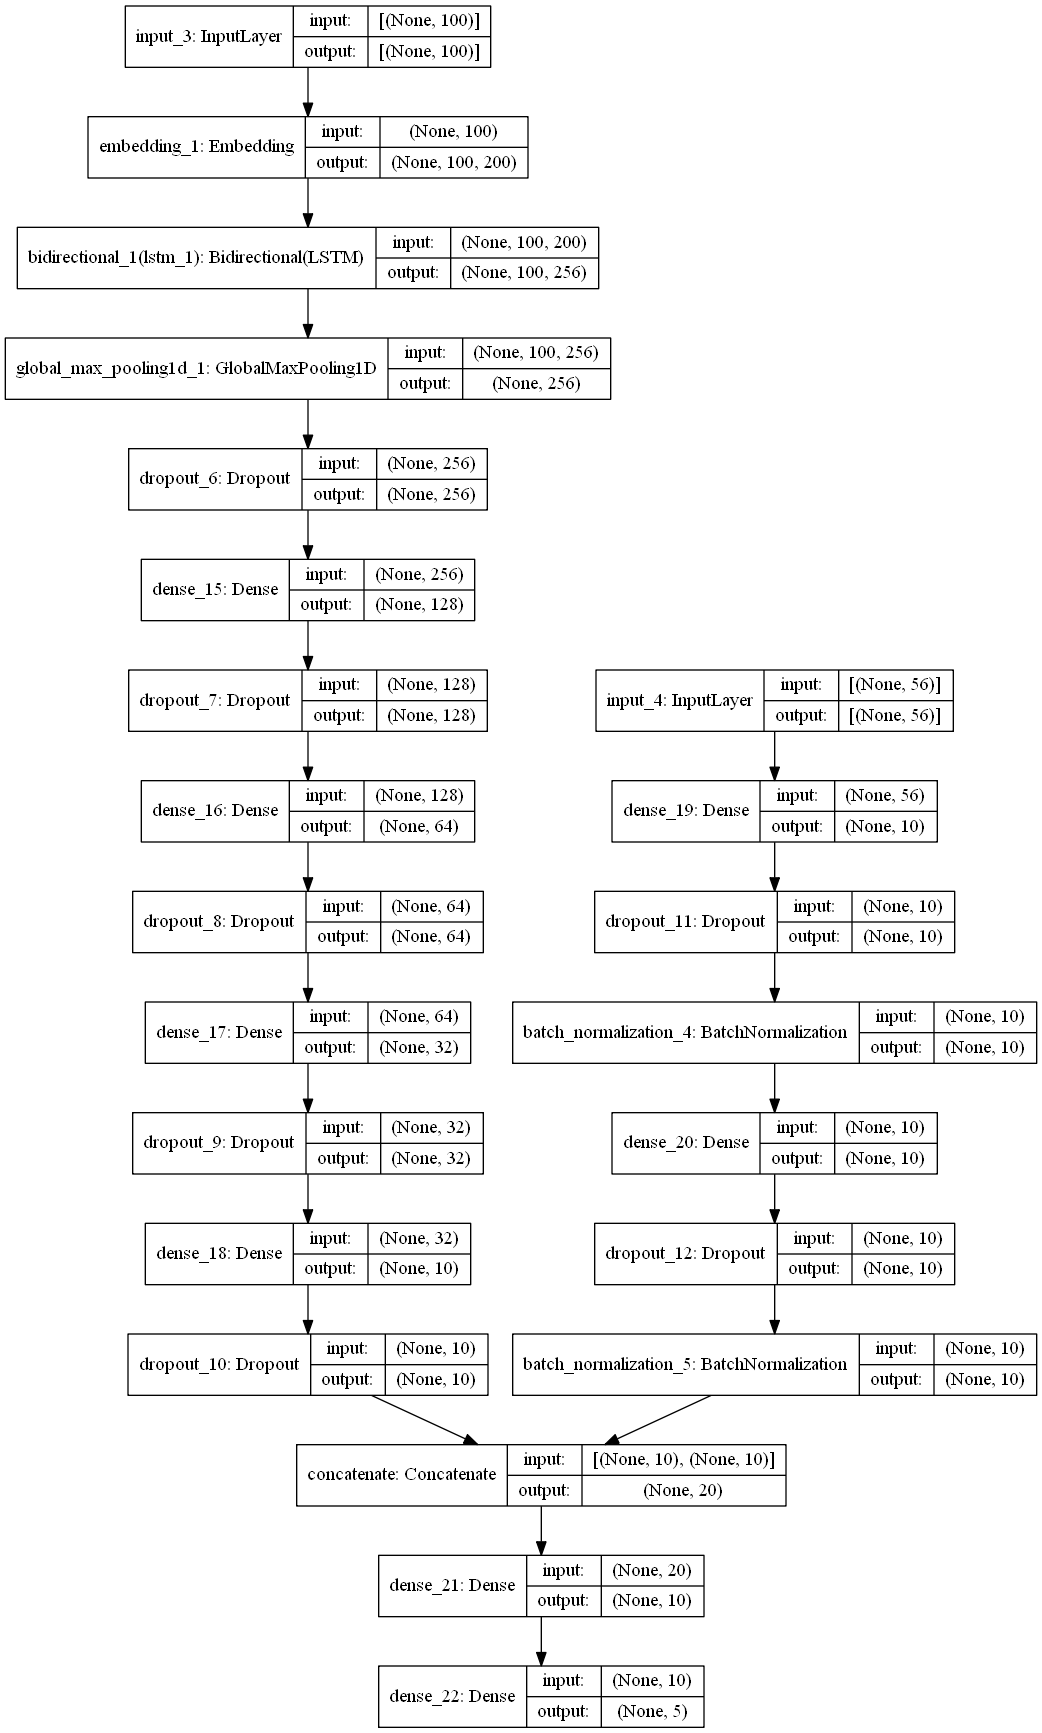

In [181]:
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [182]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=([X_text_train, X_cat_train], y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit([X_text_train, X_cat_train], y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 6s 96ms/step - loss: 1.7743 - acc: 0.1527 - val_loss: 1.4485 - val_acc: 0.7381
Epoch 2/100
42/42 [==============================] - 4s 92ms/step - loss: 1.3695 - acc: 0.5120 - val_loss: 1.2557 - val_acc: 0.7381
Epoch 3/100
42/42 [==============================] - 4s 87ms/step - loss: 1.2304 - acc: 0.6946 - val_loss: 1.1219 - val_acc: 0.7381
Epoch 4/100
42/42 [==============================] - 4s 89ms/step - loss: 1.0833 - acc: 0.7246 - val_loss: 1.0544 - val_acc: 0.7381
Epoch 5/100
42/42 [==============================] - 4s 89ms/step - loss: 1.0963 - acc: 0.7305 - val_loss: 1.0421 - val_acc: 0.7381
Epoch 6/100
42/42 [==============================] - 4s 91ms/step - loss: 1.0017 - acc: 0.7365 - val_loss: 1.0203 - val_acc: 0.7381
Epoch 7/100
42/42 [==============================] - 4s 85ms/step - loss: 1.0434 - acc: 0.7335 - val_loss: 1.0085 - val_acc: 0.7381
Epoch 8/100
42/42 [==============================] - 4s 84ms/step - loss: 0.

In [183]:
# evaluate the keras model
_, train_accuracy = model.evaluate([X_text_train, X_cat_train], y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate([X_text_test, X_cat_test], y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [184]:
accuracy, precision, recall, f1 = get_classification_metrics(model, [X_text_test, X_cat_test], y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

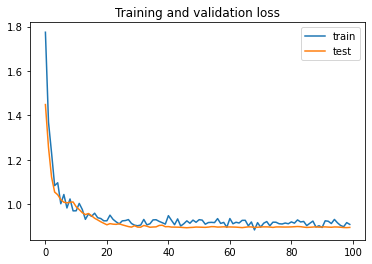

In [185]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

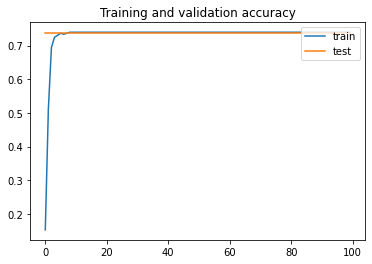

In [186]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

- **We could see it accuracy is constant after 74% reachded for both train and test.**

In [187]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model_weights.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model")
print("Saved model to disk")

# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# saving label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

Saved model weights to disk


Saved model to disk


### Conclusion

- Able to predict the accident level with a test accuracy nearly 74% and f1-score of 74%
- We have seven duplicate values in this dataset and dropped those duplicate values.
- We have no outliers in this dataset.
- We have no missing values in this dataset.
- Extracted the day, month and year from Date column and created new features such as weekday, weekofyear and seasons.
- Target variable – ‘Accident Level’ distribution is not equal (I: 309, II: 40, III: 31, IV: 30, V: 8).
- Class imbalance issue is handled using below methods and found out that, for this particular dataset, with original data we have achieved the better results.

  i. Resampling techniques: Oversampling minority class

  ii. SMOTE: Generate synthetic samples

- ***By comparing the results from all ML methods with original data, we can select the best method as GradientBoostingClassifier classifier with f1-score 69% with original data.***